# Cálculo de $\beta (s)$

[[0.00000000e+00 6.24963053e+01]
 [1.56874303e-04 6.36164579e+01]
 [6.05142617e-04 6.36164579e+01]
 [1.22608733e-03 6.42880163e+01]
 [2.00003386e-03 6.78799400e+01]
 [2.86485581e-03 6.78799400e+01]
 [3.78138106e-03 7.01627418e+01]
 [5.72490692e-03 7.01627418e+01]
 [7.76210614e-03 7.34711015e+01]
 [9.85062029e-03 7.34711015e+01]
 [1.19751990e-02 7.69880842e+01]
 [1.41247930e-02 7.69880842e+01]
 [1.62925944e-02 7.99279134e+01]
 [1.84737742e-02 8.01738085e+01]
 [2.06656810e-02 8.21847706e+01]
 [2.28666086e-02 8.19264505e+01]
 [2.50745583e-02 8.19264505e+01]
 [2.72881240e-02 8.42210066e+01]
 [2.95060501e-02 8.42210066e+01]
 [3.17280591e-02 8.42210066e+01]
 [3.39534096e-02 8.65976372e+01]
 [3.61816250e-02 8.65976372e+01]
 [3.84121723e-02 8.65976372e+01]
 [4.06448208e-02 8.76284322e+01]
 [4.28792872e-02 8.76284322e+01]
 [4.51152511e-02 8.76284322e+01]
 [4.73524593e-02 8.69919568e+01]
 [4.95906956e-02 8.86017204e+01]
 [5.18299080e-02 8.81422697e+01]
 [5.40699139e-02 8.81422697e+01]
 [5.631060

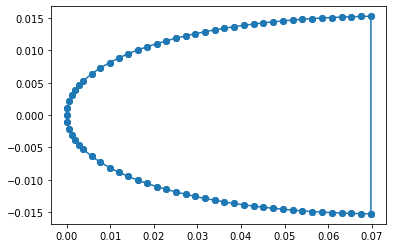

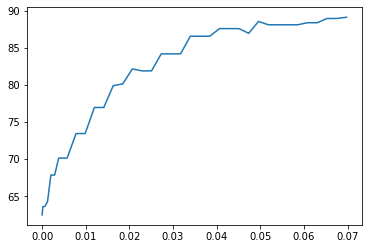

In [1]:
import pandas as pd
import numpy as np
import fem_velocidades  
import matplotlib.pyplot as plt
from matplotlib import cm
import time
import seaborn as sns
Elementos = pd.read_csv('elementos.txt')
Velocidades = pd.read_csv('flujo_velocidades.axdt')
Superficie = pd.read_csv('perfil.csv')
Superficie = Superficie[Superficie['X[m]']<0.07]
Superficie = Superficie.sort_values(by=['Y[m]'])


Modelo = fem_velocidades.modelo_fem(Elementos,Velocidades,Superficie)
Modelo = fem_velocidades.modelo_fem(Elementos,Velocidades,Superficie)
Modelo.set_T_remanso(273.15-5)
Modelo.set_presion_remanso(1e5)
Modelo.V_infinito=Modelo.V_infinito[5:] 
x,y=Modelo.exterior.xy
plt.plot(x,y,'o-')
plt.figure()
plt.plot(Modelo.V_infinito[:,0],Modelo.V_infinito[:,1])
print(Modelo.V_infinito)

Genero una población de gotas

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


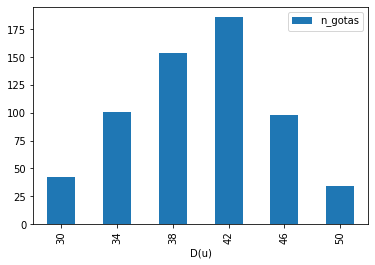

In [2]:
N_gotas =500
mu_D = 40
sd_D = 5
diametros_estudiados =[i for i in range(30,54,4)]
#diametros_estudiados=[20]
Diameters = pd.DataFrame(data=np.abs(np.random.normal(mu_D, sd_D, N_gotas)),columns=['Diametros'])
D_gotas =[]
for diametro in diametros_estudiados:    
    numero_gotas = Diameters[np.abs(Diameters['Diametros']-diametro)<2.5]['Diametros']
    D_gotas.append([diametro,len(numero_gotas)])
D_gotas = pd.DataFrame(data=D_gotas,columns=['D(u)','n_gotas'])
D_gotas.plot.bar(x='D(u)',y='n_gotas')
plt.savefig('40micras.eps')

calculando tiempo...


KeyboardInterrupt: 

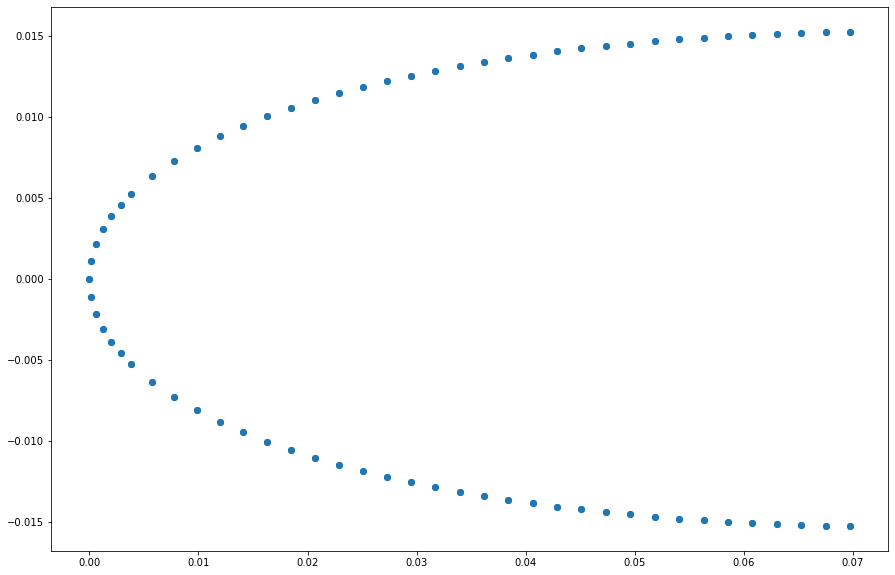

In [3]:
x_0 = min(Modelo.x_nodo) + 1e-3
x_f = 0.08
plt.figure(figsize =(15,10))
plt.plot(Modelo.x_superficie,Modelo.y_superficie,'o')
beta_x = []
U_d0 = 70
V_d0 = 0
#D =20e-6
N=1
print('calculando tiempo...')
tiempo_inicial=time.time()
D_gotas.index = D_gotas['D(u)']
for D in list(D_gotas['D(u)']):
    numero_gotas=D_gotas.loc[D]['n_gotas']
    D=D*10**-6    
    #if (N*100//N_gotas)==(N*100/N_gotas):print(N*100/N_gotas)
    #print(N*100/N_gotas)
    n_nodos = 500
    for y_0 in np.linspace(-0.015,0.015,100):
        (x,y,U_d,V_d,t) = Modelo.trayectoria_gota(x_0,x_f,y_0,U_d0,V_d0,D,n_nodos)
        #trayectoria_gota(self,x_0,x_f,y_0,U_d0,V_d0,D,n_nodos)
        x_proyecccion =Modelo.proyeccion_gota(x_0,y_0,x_f,n_nodos)
        ds = np.sqrt((y[-1]-y[0])**2+(x[-1]-x_proyecccion)**2)
        dy = np.abs(y[-1]-y[0])
        betha = dy/ds
        if y[-1] >=0:beta_x.append([D,x[-1],betha,'extrados',numero_gotas])
        else:beta_x.append([D,x[-1],betha,'intrados',numero_gotas])
        plt.plot(x,y,'k')
    print(str((time.time()-tiempo_inicial)/N*len(diametros_estudiados)/60-(time.time()-tiempo_inicial)/60)+' min')
    N=N+1
plt.savefig('trajectories_drops.eps')

In [ ]:
bethas = pd.DataFrame(data=beta_x,columns=['Diameter','x','beta','zona','n_gotas'])
bethas=bethas.dropna()
bethas = bethas[(bethas['zona']=='extrados')&(bethas['x']>=0.001)]
bethas['Volumen']=bethas['Diameter']**3
bethas['Volumen']=bethas['Diameter']**3
V_total = sum(bethas['Volumen'])
bethas
#bethas[bethas.x<0.1].plot.scatter(x='x',y='betha',c='zona',colormap='viridis')
g =sns.scatterplot(x="x", y="beta",
              hue="Diameter",
              data=bethas[bethas.x<0.07])  
plt.grid()

In [ ]:

X = np.arange(0.005,0.06,0.005)
print(X)
betha_x =[]
df=bethas[np.abs(bethas['x']-0)<0.00125]
betha_array = np.array(df.beta)
Volumen_array = np.array(df.Volumen)
betha_x.append([0,sum(betha_array[:]*Volumen_array)/sum(Volumen_array)])
if sum(Volumen_array)!=0:
    betha_x.append([0,sum(betha_array[:]*Volumen_array)/sum(Volumen_array)])
for x in X:
    df=bethas[np.abs(bethas['x']-x)<0.0025]
    betha_array = np.array(df.beta)
    Volumen_array = np.array(df.Volumen)
    if sum(Volumen_array)!=0:
        betha_x.append([x,sum(betha_array[:]*Volumen_array)/sum(Volumen_array)])

betha_x = np.array(betha_x) 
g =sns.scatterplot(x="x", y="beta",
              hue="Diameter",
              data=bethas[bethas.x<0.07])  
plt.grid()
plt.plot(betha_x[:,0],betha_x[:,1])
print(betha_x)
plt.savefig('collection_efficiency.eps')

In [ ]:
def normal_distribution(x,sd):
    return 1/(sd*np.sqrt(2*3.141592))*np.exp(-0.5*((x-0)/sd)**2)

In [ ]:
from scipy.optimize import curve_fit

In [ ]:
import pickle

In [ ]:
pickle.dump( betha_x, open( "betha.p", "wb" ) )

# Calculo  de los calores

In [ ]:
import pandas as pd
import numpy as np
import fem_velocidades  
import matplotlib.pyplot as plt
from matplotlib import cm
import time
import seaborn as sns
import pickle


In [ ]:
betha = pickle.load( open( "betha.p", "rb" ) )
betha = np.delete(betha, 0, 0)

print(betha)
def coll_efficiency(x,betha):
    x_nodos = betha[:,0]
    bethas = betha[:,1]
    for i in range(1,len(x_nodos)):
        if (x<=x_nodos[i]) and (x>=x_nodos[i-1]):
            resultado = (x-x_nodos[i-1])/(x_nodos[i]-x_nodos[i-1])*(bethas[i]-bethas[i-1])+bethas[i-1]
            break
    return resultado

In [ ]:
Modelo_termico = fem_velocidades.analisis_termico()
Modelo_termico.set_T_remanso(-15+273.15)
Modelo_termico.set_recovery_factor(.83)
Modelo_termico.set_presion_remanso(101325)
Modelo_termico.set_LWC(0.9)
Modelo_termico.set_cuerda(11.01)
Modelo_termico.set_diametro_caracteristico(2.1)
Modelo_termico.set_velocidad_flujo(70)
Modelo_termico.set_freezing_fraction(0.1)
Modelo_termico.set_flujo_masico_entrada(0)
Modelo_termico.set_T_superficie_anterior(273.15)
Modelo_termico.set_cp_ws_anterior(1.004)
Modelo_termico.set_T_superficie(273.15)
Modelo_termico.set_local_collection_efficiency(0.5)
Modelo_termico.set_freezing_fraction(1)
Modelo_termico.set_tamano_gota(20e-6)
Modelo_termico.V_e = Modelo_termico.V
Modelo_termico.T_estatica = Modelo_termico.T_remanso -Modelo_termico.V**2/2/1004.5
Modelo_termico.calculo_todos_calores()

x =np.linspace(0,0.02,100)
col_eff = betha[:,1]
# print(x,col_eff)
# print(Modelo_termico.betha_stagnation,col_eff[0])
n = np.zeros(len(x))
iter_max =1000
T_sur  = np.zeros(len(x))
for nodo in range(len(x)):
    for i in range(1,len(Modelo.V_infinito[:,0])):
        if (x[nodo]<= Modelo.V_infinito[i,0]) and  (x[nodo]>= Modelo.V_infinito[i-1,0]):
            Ve=Modelo.V_infinito[i,1]
    Modelo_termico.T_estatica = Modelo_termico.T_remanso -Ve**2/2/1004.5
    Modelo_termico.V_e = Ve

    Modelo_termico.set_T_superficie(273.15)
    Modelo_termico.set_local_collection_efficiency(coll_efficiency(x[nodo],betha))
    if nodo !=0: Modelo_termico.set_recovery_factor(.83)
    n_0 =0.1
    n_1 = 0.2
    for i in range(iter_max):
        Modelo_termico.set_freezing_fraction(n_0)
        f_0 =Modelo_termico.calculo_todos_calores()
        Modelo_termico.set_freezing_fraction(n_1)
        f_1 =Modelo_termico.calculo_todos_calores()
        df = (f_1-f_0)/(n_1-n_0)
        n_2 = n_1 -f_1/df
        if abs(f_1)<0.1:
            break
        n_0 = n_1
        n_1 =n_2
    if i ==iter_max-1:
        print(i)
        n_1 =1
        break
    if n_1 >1:
        Modelo_termico.n_0=1
        T_0 =273.15
        T_1 =260
        for i in range(iter_max): 
            Modelo_termico.set_T_superficie(T_0)
            f_0 =Modelo_termico.calculo_todos_calores()
            Modelo_termico.set_T_superficie(T_1)
            f_1 =Modelo_termico.calculo_todos_calores()
            df = (f_1-f_0)/(T_1-T_0)
            T_2 = T_1 -f_1/df
            if abs(f_1)<0.1:
                break
            T_0 = T_1
            T_1 =T_2
    
    Modelo_termico.set_flujo_masico_entrada(Modelo_termico.m_out)
    plt.plot(x[nodo],coll_efficiency(x[nodo],betha),'ok')
    if nodo ==0: Modelo_termico.set_flujo_masico_entrada(Modelo_termico.m_out)
    Modelo_termico.set_T_superficie_anterior(Modelo_termico.T_superficie)
    Modelo_termico.set_cp_ws_anterior(Modelo_termico.cp_ws(Modelo_termico.T_superficie))
    T_sur[nodo] = Modelo_termico.T_superficie
    n[nodo] = Modelo_termico.n_0
    #print(Modelo_termico.n_0,Modelo_termico.m_out,x[nodo])
    #print(Modelo_termico.m_out,Modelo_termico.m_c,Modelo_termico.m_e)
    #print(Modelo_termico.T_superficie,Modelo_termico.n_0,Modelo_termico.m_in)




In [ ]:
plt.figure()
plt.plot(x,T_sur-Modelo_termico.T_remanso)
x_sensor=np.array([0,0.01,0.02,0.03])
plt.plot(x_sensor,[10,2.6,1.34,0.79])
plt.grid()
plt.figure()
plt.plot(x,n)


In [ ]:
plt.plot(x,T_sur,'o')
plt.plot([0,0.01,0.02,0.03],[10,2.6,1.34,0.79])
plt.grid()

In [ ]:
x_experimental = np.array([0,0.01,0.018])
T_experimental = np.array([10.29,2.6,.6])

In [ ]:
Modelo_termico = fem_velocidades.analisis_termico()
Modelo_termico.set_T_remanso(-16.44+273.15)
Modelo_termico.set_recovery_factor(1)
Modelo_termico.set_presion_remanso(101325)
Modelo_termico.set_LWC(0.9)
Modelo_termico.set_cuerda(11.01)
Modelo_termico.set_diametro_caracteristico(2.1)
Modelo_termico.set_velocidad_flujo(70)
Modelo_termico.set_freezing_fraction(0.8)
Modelo_termico.set_flujo_masico_entrada(0)
Modelo_termico.set_T_superficie_anterior(273.15)
Modelo_termico.set_cp_ws_anterior(1.004)
Modelo_termico.set_T_superficie(273.15)
Modelo_termico.set_local_collection_efficiency(0.5)
Modelo_termico.set_freezing_fraction(1)
Modelo_termico.set_tamano_gota(20e-6)
Modelo_termico.V_e = Modelo_termico.V
Modelo_termico.T_estatica = Modelo_termico.T_remanso -Modelo_termico.V**2/2/1004.5
Modelo_termico.set_coeficiente_convectivo(97)
Modelo_termico.calculo_todos_calores()
plt.plot(x_experimental,T_experimental-T_experimental[0])
x =np.linspace(0,x_experimental[-1],100)
col_eff = betha[:,1]
# print(x,col_eff)
# print(Modelo_termico.betha_stagnation,col_eff[0])
n = np.zeros(len(x))
iter_max =100
T_sur  = np.zeros(len(x))
for h_c in np.linspace(200,220,9):
    Modelo_termico.set_coeficiente_convectivo(h_c)
    for nodo in range(len(x)):
        for i in range(1,len(Modelo.V_infinito[:,0])):
            if (x[nodo]<= Modelo.V_infinito[i,0]) and  (x[nodo]>= Modelo.V_infinito[i-1,0]):
                Ve=Modelo.V_infinito[i,1]
        Modelo_termico.T_estatica = Modelo_termico.T_remanso -Ve**2/2/1004.5
        Modelo_termico.V_e = Ve
        Modelo_termico.set_T_superficie(273.15)
        Modelo_termico.set_local_collection_efficiency(coll_efficiency(x[nodo],betha))
        if nodo !=0:
            #print((Modelo_termico.Prandtl)**0.5)
            Modelo_termico.set_recovery_factor(np.sqrt(Modelo_termico.Prandtl))
        n_0 =0.1
        n_1 = 0.2
        for i in range(iter_max):
            Modelo_termico.set_freezing_fraction(n_0)
            f_0 =Modelo_termico.calculo_todos_calores()
            Modelo_termico.set_freezing_fraction(n_1)
            f_1 =Modelo_termico.calculo_todos_calores()
            df = (f_1-f_0)/(n_1-n_0)
            n_2 = n_1 -f_1/df
            if abs(f_1)<0.1:
                break
            n_0 = n_1
            n_1 =n_2
        if i ==iter_max-1:
            print(i)
            n_1 =1
            break
        if n_1 >1:
            Modelo_termico.set_freezing_fraction(1)
            #print(Modelo_termico.n_0)
            T_0 =273.15
            T_1 =260
            for i in range(iter_max): 
                Modelo_termico.set_T_superficie(T_0)
                f_0 =Modelo_termico.calculo_todos_calores()
                Modelo_termico.set_T_superficie(T_1)
                f_1 =Modelo_termico.calculo_todos_calores()
                df = (f_1-f_0)/(T_1-T_0)
                T_2 = T_1 -f_1/df
                if abs(f_1)<0.1:
                    break
                T_0 = T_1
                T_1 =T_2

        Modelo_termico.set_flujo_masico_entrada(Modelo_termico.m_out)
        #print(Modelo_termico.m_e )
        #print(Modelo_termico.m_c,Modelo_termico.m_out,Modelo_termico.n_0)
        #plt.plot(x[nodo],coll_efficiency(x[nodo],betha),'ok')
        if nodo ==0: Modelo_termico.set_flujo_masico_entrada(Modelo_termico.m_out/2)
        Modelo_termico.set_T_superficie_anterior(Modelo_termico.T_superficie)
        Modelo_termico.set_cp_ws_anterior(Modelo_termico.cp_ws(Modelo_termico.T_superficie))
        T_sur[nodo] = Modelo_termico.T_superficie
        n[nodo] = Modelo_termico.n_0
    plt.plot(x,T_sur-T_sur[0],label='h_c='+str(h_c),linewidth=0.5)
plt.legend()
#lt.axis([0,0.02,0,20])

In [ ]:
x_experimental = np.array([0,0.01,0.018])
T_experimental = np.array([0,-2.85,-3.9])

In [ ]:
Modelo_termico = fem_velocidades.analisis_termico()
Modelo_termico.set_T_remanso(-4.8+273.15)
Modelo_termico.set_recovery_factor(1)
Modelo_termico.set_presion_remanso(101325)
Modelo_termico.set_LWC(0.9)
Modelo_termico.set_cuerda(11.01)
Modelo_termico.set_diametro_caracteristico(2.1)
Modelo_termico.set_velocidad_flujo(70)
Modelo_termico.set_freezing_fraction(0.8)
Modelo_termico.set_flujo_masico_entrada(0)
Modelo_termico.set_T_superficie_anterior(273.15)
Modelo_termico.set_cp_ws_anterior(1.004)
Modelo_termico.set_T_superficie(273.15)
Modelo_termico.set_local_collection_efficiency(0.5)
Modelo_termico.set_freezing_fraction(1)
Modelo_termico.set_tamano_gota(20e-6)
Modelo_termico.V_e = Modelo_termico.V
Modelo_termico.T_estatica = Modelo_termico.T_remanso -Modelo_termico.V**2/2/1004.5
Modelo_termico.set_coeficiente_convectivo(97)
Modelo_termico.calculo_todos_calores()
plt.plot(x_experimental,T_experimental-T_experimental[0])
x =np.linspace(0,x_experimental[-1],100)
col_eff = betha[:,1]
# print(x,col_eff)
# print(Modelo_termico.betha_stagnation,col_eff[0])
n = np.zeros(len(x))
iter_max =100
T_sur  = np.zeros(len(x))
for h_c in [775]:
    Modelo_termico.set_coeficiente_convectivo(h_c)
    for nodo in range(len(x)):
        for i in range(1,len(Modelo.V_infinito[:,0])):
            if (x[nodo]<= Modelo.V_infinito[i,0]) and  (x[nodo]>= Modelo.V_infinito[i-1,0]):
                Ve=Modelo.V_infinito[i,1]
        Modelo_termico.T_estatica = Modelo_termico.T_remanso -Ve**2/2/1004.5
        Modelo_termico.V_e = Ve
        Modelo_termico.set_T_superficie(273.15)
        Modelo_termico.set_local_collection_efficiency(coll_efficiency(x[nodo],betha))
        if nodo !=0:
            #print((Modelo_termico.Prandtl)**0.5)
            Modelo_termico.set_recovery_factor(np.sqrt(Modelo_termico.Prandtl))
        n_0 =0.1
        n_1 = 0.2
        for i in range(iter_max):
            Modelo_termico.set_freezing_fraction(n_0)
            f_0 =Modelo_termico.calculo_todos_calores()
            Modelo_termico.set_freezing_fraction(n_1)
            f_1 =Modelo_termico.calculo_todos_calores()
            df = (f_1-f_0)/(n_1-n_0)
            n_2 = n_1 -f_1/df
            if abs(f_1)<0.1:
                break
            n_0 = n_1
            n_1 =n_2
        if i ==iter_max-1:
            print(i)
            n_1 =1
            break
        if n_1 >1:
            Modelo_termico.set_freezing_fraction(1)
            #print(Modelo_termico.n_0)
            T_0 =273.15
            T_1 =260
            for i in range(iter_max): 
                Modelo_termico.set_T_superficie(T_0)
                f_0 =Modelo_termico.calculo_todos_calores()
                Modelo_termico.set_T_superficie(T_1)
                f_1 =Modelo_termico.calculo_todos_calores()
                df = (f_1-f_0)/(T_1-T_0)
                T_2 = T_1 -f_1/df
                if abs(f_1)<0.1:
                    break
                T_0 = T_1
                T_1 =T_2

        Modelo_termico.set_flujo_masico_entrada(Modelo_termico.m_out)
        #print(Modelo_termico.m_e )
        #print(Modelo_termico.m_c,Modelo_termico.m_out,Modelo_termico.n_0)
        #plt.plot(x[nodo],coll_efficiency(x[nodo],betha),'ok')
        if nodo ==0: Modelo_termico.set_flujo_masico_entrada(Modelo_termico.m_out/2)
        Modelo_termico.set_T_superficie_anterior(Modelo_termico.T_superficie)
        Modelo_termico.set_cp_ws_anterior(Modelo_termico.cp_ws(Modelo_termico.T_superficie))
        T_sur[nodo] = Modelo_termico.T_superficie
        n[nodo] = Modelo_termico.n_0
    plt.plot(x,T_sur-273.15,label='h_c='+str(h_c),linewidth=0.5)   
   
plt.legend()

In [ ]:
x_experimental = np.array([0,0.01,0.018])
T_experimental = np.array([-1.54,-4.29,-4.76])

In [ ]:
Modelo_termico = fem_velocidades.analisis_termico()
Modelo_termico.set_T_remanso(-6.32+273.15)
Modelo_termico.set_recovery_factor(1)
Modelo_termico.set_presion_remanso(101325)
Modelo_termico.set_LWC(0.6)
Modelo_termico.set_cuerda(11.01)
Modelo_termico.set_diametro_caracteristico(2.1)
Modelo_termico.set_velocidad_flujo(70)
Modelo_termico.set_freezing_fraction(0.8)
Modelo_termico.set_flujo_masico_entrada(0)
Modelo_termico.set_T_superficie_anterior(273.15)
Modelo_termico.set_cp_ws_anterior(1.004)
Modelo_termico.set_T_superficie(273.15)
Modelo_termico.set_local_collection_efficiency(0.5)
Modelo_termico.set_freezing_fraction(1)
Modelo_termico.set_tamano_gota(20e-6)
Modelo_termico.V_e = Modelo_termico.V
Modelo_termico.T_estatica = Modelo_termico.T_remanso -Modelo_termico.V**2/2/1004.5
Modelo_termico.set_coeficiente_convectivo(97)
Modelo_termico.calculo_todos_calores()
plt.plot(x_experimental,T_experimental)
x =np.linspace(0,x_experimental[-1],100)
col_eff = betha[:,1]
# print(x,col_eff)
# print(Modelo_termico.betha_stagnation,col_eff[0])
n = np.zeros(len(x))
iter_max =100
T_sur  = np.zeros(len(x))
for h_c in np.linspace(450,500,6):
    Modelo_termico.set_coeficiente_convectivo(h_c)
    for nodo in range(len(x)):
        for i in range(1,len(Modelo.V_infinito[:,0])):
            if (x[nodo]<= Modelo.V_infinito[i,0]) and  (x[nodo]>= Modelo.V_infinito[i-1,0]):
                Ve=Modelo.V_infinito[i,1]
        Modelo_termico.T_estatica = Modelo_termico.T_remanso -Ve**2/2/1004.5
        Modelo_termico.V_e = Ve
        Modelo_termico.set_T_superficie(273.15)
        Modelo_termico.set_local_collection_efficiency(coll_efficiency(x[nodo],betha))
        if nodo !=0:
            #print((Modelo_termico.Prandtl)**0.5)
            Modelo_termico.set_recovery_factor(np.sqrt(Modelo_termico.Prandtl))
        n_0 =0.1
        n_1 = 0.2
        for i in range(iter_max):
            Modelo_termico.set_freezing_fraction(n_0)
            f_0 =Modelo_termico.calculo_todos_calores()
            Modelo_termico.set_freezing_fraction(n_1)
            f_1 =Modelo_termico.calculo_todos_calores()
            df = (f_1-f_0)/(n_1-n_0)
            n_2 = n_1 -f_1/df
            if abs(f_1)<0.1:
                break
            n_0 = n_1
            n_1 =n_2
        if i ==iter_max-1:
            print(i)
            n_1 =1
            break
        if n_1 >1:
            Modelo_termico.set_freezing_fraction(1)
            #print(Modelo_termico.n_0)
            T_0 =273.15
            T_1 =260
            for i in range(iter_max): 
                Modelo_termico.set_T_superficie(T_0)
                f_0 =Modelo_termico.calculo_todos_calores()
                Modelo_termico.set_T_superficie(T_1)
                f_1 =Modelo_termico.calculo_todos_calores()
                df = (f_1-f_0)/(T_1-T_0)
                T_2 = T_1 -f_1/df
                if abs(f_1)<0.1:
                    break
                T_0 = T_1
                T_1 =T_2

        Modelo_termico.set_flujo_masico_entrada(Modelo_termico.m_out)
        #print(Modelo_termico.m_e )
        #print(Modelo_termico.m_c,Modelo_termico.m_out,Modelo_termico.n_0)
        #plt.plot(x[nodo],coll_efficiency(x[nodo],betha),'ok')
        if nodo ==0: Modelo_termico.set_flujo_masico_entrada(Modelo_termico.m_out/2)
        Modelo_termico.set_T_superficie_anterior(Modelo_termico.T_superficie)
        Modelo_termico.set_cp_ws_anterior(Modelo_termico.cp_ws(Modelo_termico.T_superficie))
        T_sur[nodo] = Modelo_termico.T_superficie
        n[nodo] = Modelo_termico.n_0
    plt.plot(x,T_sur-273.15,label='h_c='+str(h_c),linewidth=0.5)   
   
plt.legend()

In [ ]:
x_experimental = np.array([0,0.01,0.018])
T_experimental = np.array([-4.05,-5.47,-5.73])

In [ ]:
Modelo_termico = fem_velocidades.analisis_termico()
Modelo_termico.set_T_remanso(-6+273.15)
Modelo_termico.set_recovery_factor(1)
Modelo_termico.set_presion_remanso(101325)
Modelo_termico.set_LWC(0.3)
Modelo_termico.set_cuerda(11.01)
Modelo_termico.set_diametro_caracteristico(2.1)
Modelo_termico.set_velocidad_flujo(70)
Modelo_termico.set_freezing_fraction(0.8)
Modelo_termico.set_flujo_masico_entrada(0)
Modelo_termico.set_T_superficie_anterior(273.15)
Modelo_termico.set_cp_ws_anterior(1.004)
Modelo_termico.set_T_superficie(273.15)
Modelo_termico.set_local_collection_efficiency(0.5)
Modelo_termico.set_freezing_fraction(1)
Modelo_termico.set_tamano_gota(20e-6)
Modelo_termico.V_e = Modelo_termico.V
Modelo_termico.T_estatica = Modelo_termico.T_remanso -Modelo_termico.V**2/2/1004.5
Modelo_termico.set_coeficiente_convectivo(97)
Modelo_termico.calculo_todos_calores()
plt.plot(x_experimental,T_experimental)
x =np.linspace(0,x_experimental[-1],100)
col_eff = betha[:,1]
# print(x,col_eff)
# print(Modelo_termico.betha_stagnation,col_eff[0])
n = np.zeros(len(x))
iter_max =100
T_sur  = np.zeros(len(x))
for h_c in [550]:
    Modelo_termico.set_coeficiente_convectivo(h_c)
    for nodo in range(len(x)):
        for i in range(1,len(Modelo.V_infinito[:,0])):
            if (x[nodo]<= Modelo.V_infinito[i,0]) and  (x[nodo]>= Modelo.V_infinito[i-1,0]):
                Ve=Modelo.V_infinito[i,1]
        Modelo_termico.T_estatica = Modelo_termico.T_remanso -Ve**2/2/1004.5
        Modelo_termico.V_e = Ve
        Modelo_termico.set_T_superficie(273.15)
        Modelo_termico.set_local_collection_efficiency(coll_efficiency(x[nodo],betha))
        if nodo !=0:
            #print((Modelo_termico.Prandtl)**0.5)
            Modelo_termico.set_recovery_factor(np.sqrt(Modelo_termico.Prandtl))
        n_0 =0.1
        n_1 = 0.2
        for i in range(iter_max):
            Modelo_termico.set_freezing_fraction(n_0)
            f_0 =Modelo_termico.calculo_todos_calores()
            Modelo_termico.set_freezing_fraction(n_1)
            f_1 =Modelo_termico.calculo_todos_calores()
            df = (f_1-f_0)/(n_1-n_0)
            n_2 = n_1 -f_1/df
            if abs(f_1)<0.1:
                break
            n_0 = n_1
            n_1 =n_2
        if i ==iter_max-1:
            print(i)
            n_1 =1
            break
        if n_1 >1:
            Modelo_termico.set_freezing_fraction(1)
            #print(Modelo_termico.n_0)
            T_0 =273.15
            T_1 =260
            for i in range(iter_max): 
                Modelo_termico.set_T_superficie(T_0)
                f_0 =Modelo_termico.calculo_todos_calores()
                Modelo_termico.set_T_superficie(T_1)
                f_1 =Modelo_termico.calculo_todos_calores()
                df = (f_1-f_0)/(T_1-T_0)
                T_2 = T_1 -f_1/df
                if abs(f_1)<0.1:
                    break
                T_0 = T_1
                T_1 =T_2

        Modelo_termico.set_flujo_masico_entrada(Modelo_termico.m_out)
        #print(Modelo_termico.m_e )
        #print(Modelo_termico.m_c,Modelo_termico.m_out,Modelo_termico.n_0)
        #plt.plot(x[nodo],coll_efficiency(x[nodo],betha),'ok')
        if nodo ==0: Modelo_termico.set_flujo_masico_entrada(Modelo_termico.m_out/2)
        Modelo_termico.set_T_superficie_anterior(Modelo_termico.T_superficie)
        Modelo_termico.set_cp_ws_anterior(Modelo_termico.cp_ws(Modelo_termico.T_superficie))
        T_sur[nodo] = Modelo_termico.T_superficie
        n[nodo] = Modelo_termico.n_0
    plt.plot(x,T_sur-273.15,label='h_c='+str(h_c),linewidth=0.5)   
   
plt.legend()

## Cálculo de diámetro característico


In [ ]:
def minimizacion_error(d,T_remanso,LWC,V,betha,x_experimental,T_experimental):
    Modelo_termico = fem_velocidades.analisis_termico()
    Modelo_termico.set_T_remanso(T_remanso+273.15)
    Modelo_termico.set_recovery_factor(1)
    Modelo_termico.set_presion_remanso(101325)
    Modelo_termico.set_LWC(LWC)
    Modelo_termico.set_cuerda(11.01)
    
    Modelo_termico.set_velocidad_flujo(V)
    Modelo_termico.set_freezing_fraction(0.8)
    Modelo_termico.set_flujo_masico_entrada(0)
    Modelo_termico.set_T_superficie_anterior(273.15)
    Modelo_termico.set_cp_ws_anterior(1.004)
    Modelo_termico.set_T_superficie(273.15)
    Modelo_termico.set_local_collection_efficiency(0.5)
    Modelo_termico.set_freezing_fraction(1)
    Modelo_termico.set_tamano_gota(20e-6)
    Modelo_termico.V_e = Modelo_termico.V
    Modelo_termico.T_estatica = Modelo_termico.T_remanso -Modelo_termico.V**2/2/1004.5
    Modelo_termico.set_coeficiente_convectivo(97)
    Modelo_termico.calculo_todos_calores_d(d)
    #plt.plot(x_experimental,T_experimental)
    x =np.linspace(0,x_experimental[-1],100)
    col_eff = betha[:,1]
    # print(x,col_eff)
    # print(Modelo_termico.betha_stagnation,col_eff[0])
    n = np.zeros(len(x))
    iter_max =100
    T_sur  = np.zeros(len(x))
    for h_c in [550]:
        Modelo_termico.set_coeficiente_convectivo(h_c)
        for nodo in range(len(x)):
            for i in range(1,len(Modelo.V_infinito[:,0])):
                if (x[nodo]<= Modelo.V_infinito[i,0]) and  (x[nodo]>= Modelo.V_infinito[i-1,0]):
                    Ve=Modelo.V_infinito[i,1]
            Modelo_termico.T_estatica = Modelo_termico.T_remanso -Ve**2/2/1004.5
            Modelo_termico.V_e = Ve
            Modelo_termico.set_T_superficie(273.15)
            Modelo_termico.set_local_collection_efficiency(coll_efficiency(x[nodo],betha))
            if nodo !=0:
                #print((Modelo_termico.Prandtl)**0.5)
                Modelo_termico.set_recovery_factor(np.sqrt(Modelo_termico.Prandtl))
            n_0 =0.1
            n_1 = 0.2
            for i in range(iter_max):
                Modelo_termico.set_freezing_fraction(n_0)
                f_0 =Modelo_termico.calculo_todos_calores_d(d)
                Modelo_termico.set_freezing_fraction(n_1)
                f_1 =Modelo_termico.calculo_todos_calores_d(d)
                df = (f_1-f_0)/(n_1-n_0)
                n_2 = n_1 -f_1/df
                if abs(f_1)<0.1:
                    break
                n_0 = n_1
                n_1 =n_2
            if i ==iter_max-1:
                print(i)
                n_1 =1
                break
            if n_1 >1:
                Modelo_termico.set_freezing_fraction(1)
                #print(Modelo_termico.n_0)
                T_0 =273.15
                T_1 =260
                for i in range(iter_max): 
                    Modelo_termico.set_T_superficie(T_0)
                    f_0 =Modelo_termico.calculo_todos_calores_d(d)
                    Modelo_termico.set_T_superficie(T_1)
                    f_1 =Modelo_termico.calculo_todos_calores_d(d)
                    df = (f_1-f_0)/(T_1-T_0)
                    T_2 = T_1 -f_1/df
                    if abs(f_1)<0.1:
                        break
                    T_0 = T_1
                    T_1 =T_2

            Modelo_termico.set_flujo_masico_entrada(Modelo_termico.m_out)
            #print(Modelo_termico.m_e )
            #print(Modelo_termico.m_c,Modelo_termico.m_out,Modelo_termico.n_0)
            #plt.plot(x[nodo],coll_efficiency(x[nodo],betha),'ok')
            if nodo ==0: Modelo_termico.set_flujo_masico_entrada(Modelo_termico.m_out/2)
            Modelo_termico.set_T_superficie_anterior(Modelo_termico.T_superficie)
            Modelo_termico.set_cp_ws_anterior(Modelo_termico.cp_ws(Modelo_termico.T_superficie))
            T_sur[nodo] = Modelo_termico.T_superficie
            n[nodo] = Modelo_termico.n_0
        #plt.plot(x,T_sur-273.15,label='h_c='+str(h_c),linewidth=0.5)   
    T_teorico =np.zeros(len(T_experimental))
    T_teorico[0] = T_sur[0]
    error = (T_teorico[0] - T_experimental[0])**2
    for i in range(1,len(T_experimental)):
        for j in range(1,len(x)):
            if (x_experimental[i]>=x[j-1]) and (x_experimental[i]<=x[j]):
                T_teorico[i]= T_sur[j]
                error = error + (T_teorico[i] - T_experimental[i])**2
                break
    
    return np.sqrt(error)
            
    #plt.legend()

In [ ]:
from scipy.optimize import minimize
from scipy.optimize import Bounds


In [ ]:

T_remanso=-4.8
LWC=0.9
V=70
#bounds = Bounds(0, 1)
x_experimental = np.array([0,0.01,0.018])
T_experimental = np.array([0,-2.85,-3.9])

In [ ]:
result = minimize(minimizacion_error,1e-2, args=(T_remanso,LWC,V,betha,x_experimental,T_experimental+273.15), method='trust-constr')
d= float(result.x)

In [ ]:
print(result.success)
print(d)
print(result.fun)

In [ ]:
Modelo_termico = fem_velocidades.analisis_termico()
Modelo_termico.set_T_remanso(T_remanso+273.15)
Modelo_termico.set_recovery_factor(1)
Modelo_termico.set_presion_remanso(101325)
Modelo_termico.set_LWC(LWC)
Modelo_termico.set_cuerda(11.01)

Modelo_termico.set_velocidad_flujo(V)
Modelo_termico.set_freezing_fraction(0.8)
Modelo_termico.set_flujo_masico_entrada(0)
Modelo_termico.set_T_superficie_anterior(273.15)
Modelo_termico.set_cp_ws_anterior(1.004)
Modelo_termico.set_T_superficie(273.15)
Modelo_termico.set_local_collection_efficiency(0.5)
Modelo_termico.set_freezing_fraction(1)
Modelo_termico.set_tamano_gota(20e-6)
Modelo_termico.V_e = Modelo_termico.V
Modelo_termico.T_estatica = Modelo_termico.T_remanso -Modelo_termico.V**2/2/1004.5
Modelo_termico.set_coeficiente_convectivo(97)
Modelo_termico.calculo_todos_calores_d(d)
plt.plot(x_experimental,T_experimental)
x =np.linspace(0,x_experimental[-1],100)
col_eff = betha[:,1]
# print(x,col_eff)
# print(Modelo_termico.betha_stagnation,col_eff[0])
n = np.zeros(len(x))
iter_max =100
T_sur  = np.zeros(len(x))
for h_c in [550]:
    Modelo_termico.set_coeficiente_convectivo(h_c)
    for nodo in range(len(x)):
        for i in range(1,len(Modelo.V_infinito[:,0])):
            if (x[nodo]<= Modelo.V_infinito[i,0]) and  (x[nodo]>= Modelo.V_infinito[i-1,0]):
                Ve=Modelo.V_infinito[i,1]
        Modelo_termico.T_estatica = Modelo_termico.T_remanso -Ve**2/2/1004.5
        Modelo_termico.V_e = Ve
        Modelo_termico.set_T_superficie(273.15)
        Modelo_termico.set_local_collection_efficiency(coll_efficiency(x[nodo],betha))
        if nodo !=0:
            #print((Modelo_termico.Prandtl)**0.5)
            Modelo_termico.set_recovery_factor(np.sqrt(Modelo_termico.Prandtl))
        n_0 =0.1
        n_1 = 0.2
        for i in range(iter_max):
            Modelo_termico.set_freezing_fraction(n_0)
            f_0 =Modelo_termico.calculo_todos_calores_d(d)
            Modelo_termico.set_freezing_fraction(n_1)
            f_1 =Modelo_termico.calculo_todos_calores_d(d)
            df = (f_1-f_0)/(n_1-n_0)
            n_2 = n_1 -f_1/df
            if abs(f_1)<0.1:
                break
            n_0 = n_1
            n_1 =n_2
        if i ==iter_max-1:
            print(i)
            n_1 =1
            break
        if n_1 >1:
            Modelo_termico.set_freezing_fraction(1)
            #print(Modelo_termico.n_0)
            T_0 =273.15
            T_1 =260
            for i in range(iter_max): 
                Modelo_termico.set_T_superficie(T_0)
                f_0 =Modelo_termico.calculo_todos_calores_d(d)
                Modelo_termico.set_T_superficie(T_1)
                f_1 =Modelo_termico.calculo_todos_calores_d(d)
                df = (f_1-f_0)/(T_1-T_0)
                T_2 = T_1 -f_1/df
                if abs(f_1)<0.1:
                    break
                T_0 = T_1
                T_1 =T_2

        Modelo_termico.set_flujo_masico_entrada(Modelo_termico.m_out)
        #print(Modelo_termico.m_e )
        #print(Modelo_termico.m_c,Modelo_termico.m_out,Modelo_termico.n_0)
        #plt.plot(x[nodo],coll_efficiency(x[nodo],betha),'ok')
        if nodo ==0: Modelo_termico.set_flujo_masico_entrada(Modelo_termico.m_out/2)
        Modelo_termico.set_T_superficie_anterior(Modelo_termico.T_superficie)
        Modelo_termico.set_cp_ws_anterior(Modelo_termico.cp_ws(Modelo_termico.T_superficie))
        T_sur[nodo] = Modelo_termico.T_superficie
        n[nodo] = Modelo_termico.n_0
plt.plot(x,T_sur-273.15,label='h_c='+str(h_c),linewidth=0.5) 

In [ ]:
T_remanso=-6.15
LWC=0.6
V=70
#bounds = Bounds(0, 1)
x_experimental = np.array([0,0.01,0.018])
T_experimental = np.array([-1.54,-4.29,-4.76])

In [ ]:
result = minimize(minimizacion_error,1e-2, args=(T_remanso,LWC,V,betha,x_experimental,T_experimental+273.15), method='trust-constr')
d= float(result.x)

In [ ]:
print(result.success)
print(d)
print(result.fun)

In [ ]:
Modelo_termico = fem_velocidades.analisis_termico()
Modelo_termico.set_T_remanso(T_remanso+273.15)
Modelo_termico.set_recovery_factor(1)
Modelo_termico.set_presion_remanso(101325)
Modelo_termico.set_LWC(LWC)
Modelo_termico.set_cuerda(11.01)

Modelo_termico.set_velocidad_flujo(V)
Modelo_termico.set_freezing_fraction(0.8)
Modelo_termico.set_flujo_masico_entrada(0)
Modelo_termico.set_T_superficie_anterior(273.15)
Modelo_termico.set_cp_ws_anterior(1.004)
Modelo_termico.set_T_superficie(273.15)
Modelo_termico.set_local_collection_efficiency(0.5)
Modelo_termico.set_freezing_fraction(1)
Modelo_termico.set_tamano_gota(20e-6)
Modelo_termico.V_e = Modelo_termico.V
Modelo_termico.T_estatica = Modelo_termico.T_remanso -Modelo_termico.V**2/2/1004.5
Modelo_termico.set_coeficiente_convectivo(97)
Modelo_termico.calculo_todos_calores_d(d)
plt.plot(x_experimental,T_experimental)
x =np.linspace(0,x_experimental[-1],100)
col_eff = betha[:,1]
# print(x,col_eff)
# print(Modelo_termico.betha_stagnation,col_eff[0])
n = np.zeros(len(x))
iter_max =100
T_sur  = np.zeros(len(x))
for h_c in [550]:
    Modelo_termico.set_coeficiente_convectivo(h_c)
    for nodo in range(len(x)):
        for i in range(1,len(Modelo.V_infinito[:,0])):
            if (x[nodo]<= Modelo.V_infinito[i,0]) and  (x[nodo]>= Modelo.V_infinito[i-1,0]):
                Ve=Modelo.V_infinito[i,1]
        Modelo_termico.T_estatica = Modelo_termico.T_remanso -Ve**2/2/1004.5
        Modelo_termico.V_e = Ve
        Modelo_termico.set_T_superficie(273.15)
        Modelo_termico.set_local_collection_efficiency(coll_efficiency(x[nodo],betha))
        if nodo !=0:
            #print((Modelo_termico.Prandtl)**0.5)
            Modelo_termico.set_recovery_factor(np.sqrt(Modelo_termico.Prandtl))
        n_0 =0.1
        n_1 = 0.2
        for i in range(iter_max):
            Modelo_termico.set_freezing_fraction(n_0)
            f_0 =Modelo_termico.calculo_todos_calores_d(d)
            Modelo_termico.set_freezing_fraction(n_1)
            f_1 =Modelo_termico.calculo_todos_calores_d(d)
            df = (f_1-f_0)/(n_1-n_0)
            n_2 = n_1 -f_1/df
            if abs(f_1)<0.1:
                break
            n_0 = n_1
            n_1 =n_2
        if i ==iter_max-1:
            print(i)
            n_1 =1
            break
        if n_1 >1:
            Modelo_termico.set_freezing_fraction(1)
            #print(Modelo_termico.n_0)
            T_0 =273.15
            T_1 =260
            for i in range(iter_max): 
                Modelo_termico.set_T_superficie(T_0)
                f_0 =Modelo_termico.calculo_todos_calores_d(d)
                Modelo_termico.set_T_superficie(T_1)
                f_1 =Modelo_termico.calculo_todos_calores_d(d)
                df = (f_1-f_0)/(T_1-T_0)
                T_2 = T_1 -f_1/df
                if abs(f_1)<0.1:
                    break
                T_0 = T_1
                T_1 =T_2

        Modelo_termico.set_flujo_masico_entrada(Modelo_termico.m_out)
        #print(Modelo_termico.m_e )
        #print(Modelo_termico.m_c,Modelo_termico.m_out,Modelo_termico.n_0)
        #plt.plot(x[nodo],coll_efficiency(x[nodo],betha),'ok')
        if nodo ==0: Modelo_termico.set_flujo_masico_entrada(Modelo_termico.m_out/2)
        Modelo_termico.set_T_superficie_anterior(Modelo_termico.T_superficie)
        Modelo_termico.set_cp_ws_anterior(Modelo_termico.cp_ws(Modelo_termico.T_superficie))
        T_sur[nodo] = Modelo_termico.T_superficie
        n[nodo] = Modelo_termico.n_0
plt.plot(x,T_sur-273.15,label='h_c='+str(h_c),linewidth=0.5) 

Ha fracasado el cálculo del diámetro característico

## Cálculo de $h_{c}$ 


Se crea una base de datos con todos los ensayos:


In [ ]:
ensayo ={}
x_experimental = [0,0.01,0.018,0.027,0.035]

In [ ]:
nombre_ensayo ='glaze_5B'
ensayo.update({nombre_ensayo:{}})
ensayo[nombre_ensayo].update({'LWC':0.6})
ensayo[nombre_ensayo].update({'x':x_experimental})
ensayo[nombre_ensayo].update({'T_0':-6.59})
ensayo[nombre_ensayo].update({'T_f':[0,-3.94,-5.2,-5.92,-6.02]})

In [ ]:
nombre_ensayo ='glaze_5C'
ensayo.update({nombre_ensayo:{}})
ensayo[nombre_ensayo].update({'LWC':0.9})
ensayo[nombre_ensayo].update({'x':x_experimental})
ensayo[nombre_ensayo].update({'T_0':-4.8})
ensayo[nombre_ensayo].update({'T_f':[0,-2.48,-3.67,-4.57,-4.88]})

In [ ]:
nombre_ensayo ='glaze_5A'
ensayo.update({nombre_ensayo:{}})
ensayo[nombre_ensayo].update({'LWC':0.3})
ensayo[nombre_ensayo].update({'x':x_experimental})
ensayo[nombre_ensayo].update({'T_0':-5.93})
ensayo[nombre_ensayo].update({'T_f':[-4.04,-4.8,-4.89,-5.62,-5.63]})

In [ ]:
nombre_ensayo ='rime_5A'
ensayo.update({nombre_ensayo:{}})
ensayo[nombre_ensayo].update({'LWC':0.3})


ensayo[nombre_ensayo].update({'x':[0,0.002,0.01,0.018,0.027,0.035]})
ensayo[nombre_ensayo].update({'T_0':-13.54})
ensayo[nombre_ensayo].update({'T_f':[-9.92,-10.22,-11.64,-12.19,-12.58,-12.61]})

In [ ]:
nombre_ensayo ='rime_5B'
ensayo.update({nombre_ensayo:{}})
ensayo[nombre_ensayo].update({'LWC':0.6})
ensayo[nombre_ensayo].update({'x':[0,0.002,0.01,0.018,0.027,0.035]})
ensayo[nombre_ensayo].update({'T_0':-13.29})
ensayo[nombre_ensayo].update({'T_f':[-6.96,-7.7,-10.38,-11.51,-12.33,-12.7]})

In [ ]:
nombre_ensayo ='rime_5C'
ensayo.update({nombre_ensayo:{}})
ensayo[nombre_ensayo].update({'LWC':0.9})
ensayo[nombre_ensayo].update({'x':[0,0.01,0.018,0.027,0.035]})
ensayo[nombre_ensayo].update({'T_0':-13.54})
ensayo[nombre_ensayo].update({'T_f':[-4.76,-8.67,-10.92,-11.97,-12.34]})

In [ ]:
nombre_ensayo ='rime_5A_P2'
ensayo.update({nombre_ensayo:{}})
ensayo[nombre_ensayo].update({'LWC':0.3})


ensayo[nombre_ensayo].update({'x':[0,0.01,0.018,0.027,0.035]})
ensayo[nombre_ensayo].update({'T_0':-14.95})
ensayo[nombre_ensayo].update({'T_f':[-10.76,-12.84,-12.75,-13.06,-13.06]})

In [ ]:
nombre_ensayo ='rime_5B_P2'
ensayo.update({nombre_ensayo:{}})
ensayo[nombre_ensayo].update({'LWC':0.6})
ensayo[nombre_ensayo].update({'x':[0,0.01,0.018,0.027,0.035]})
ensayo[nombre_ensayo].update({'T_0':-12.96})
ensayo[nombre_ensayo].update({'T_f':[-7.05,-10.23,-10.67,-11.45,-11.64]})

In [ ]:
nombre_ensayo ='rime_5C_P2'
ensayo.update({nombre_ensayo:{}})
ensayo[nombre_ensayo].update({'LWC':0.9})
ensayo[nombre_ensayo].update({'x':[0,0.01,0.018,0.027,0.035]})
ensayo[nombre_ensayo].update({'T_0':-15.38})
ensayo[nombre_ensayo].update({'T_f':[-3.61,-10.03,-11.62,-12.35,-12.63]})

In [ ]:
def minimizacion_error(h_c,T_remanso,LWC,V,betha,x_experimental,T_experimental):
    Modelo_termico = fem_velocidades.analisis_termico()
    Modelo_termico.set_T_remanso(T_remanso+273.15)
    Modelo_termico.set_recovery_factor(1)
    Modelo_termico.set_presion_remanso(101325)
    Modelo_termico.set_LWC(LWC)
    Modelo_termico.set_cuerda(11.01)
    Modelo_termico.set_diametro_caracteristico(0.02)
    Modelo_termico.set_velocidad_flujo(V)
    Modelo_termico.set_freezing_fraction(0.8)
    Modelo_termico.set_flujo_masico_entrada(0)
    Modelo_termico.set_T_superficie_anterior(273.15)
    Modelo_termico.set_cp_ws_anterior(1.004)
    Modelo_termico.set_T_superficie(273.15)
    Modelo_termico.set_local_collection_efficiency(0.5)
    Modelo_termico.set_freezing_fraction(1)
    Modelo_termico.set_tamano_gota(20e-6)
    Modelo_termico.V_e = Modelo_termico.V
    Modelo_termico.T_estatica = Modelo_termico.T_remanso -Modelo_termico.V**2/2/1004.5
    Modelo_termico.set_coeficiente_convectivo(h_c)
    Modelo_termico.calculo_todos_calores()
    #plt.plot(x_experimental,T_experimental)
    x =np.linspace(0,x_experimental[-1],100)
    col_eff = betha[:,1]
    # print(x,col_eff)
    # print(Modelo_termico.betha_stagnation,col_eff[0])
    n = np.zeros(len(x))
    iter_max =100
    T_sur  = np.zeros(len(x))
    
    for nodo in range(len(x)):
        for i in range(1,len(Modelo.V_infinito[:,0])):
            if (x[nodo]<= Modelo.V_infinito[i,0]) and  (x[nodo]>= Modelo.V_infinito[i-1,0]):
                Ve=Modelo.V_infinito[i,1]
        Modelo_termico.T_estatica = Modelo_termico.T_remanso -Ve**2/2/1004.5
        Modelo_termico.V_e = Ve
        Modelo_termico.set_T_superficie(273.15)
        Modelo_termico.set_local_collection_efficiency(coll_efficiency(x[nodo],betha))
        if nodo !=0:
            #print((Modelo_termico.Prandtl)**0.5)
            Modelo_termico.set_recovery_factor(np.sqrt(Modelo_termico.Prandtl))
        n_0 =0.1
        n_1 = 0.2
        for i in range(iter_max):
            Modelo_termico.set_freezing_fraction(n_0)
            f_0 =Modelo_termico.calculo_todos_calores()
            Modelo_termico.set_freezing_fraction(n_1)
            f_1 =Modelo_termico.calculo_todos_calores()
            df = (f_1-f_0)/(n_1-n_0)
            n_2 = n_1 -f_1/df
            if abs(f_1)<0.1:
                break
            n_0 = n_1
            n_1 =n_2
        if i ==iter_max-1:
            
            n_1 =1
            break
        if n_1 >1:
            Modelo_termico.set_freezing_fraction(1)
            #print(Modelo_termico.n_0)
            T_0 =273.15
            T_1 =260
            for i in range(iter_max): 
                Modelo_termico.set_T_superficie(T_0)
                f_0 =Modelo_termico.calculo_todos_calores()
                Modelo_termico.set_T_superficie(T_1)
                f_1 =Modelo_termico.calculo_todos_calores()
                df = (f_1-f_0)/(T_1-T_0)
                T_2 = T_1 -f_1/df
                if abs(f_1)<0.1:
                    break
                T_0 = T_1
                T_1 =T_2

        Modelo_termico.set_flujo_masico_entrada(Modelo_termico.m_out)
        #print(Modelo_termico.m_e )
        #print(Modelo_termico.m_c,Modelo_termico.m_out,Modelo_termico.n_0)
        #plt.plot(x[nodo],coll_efficiency(x[nodo],betha),'ok')
        if nodo ==0: Modelo_termico.set_flujo_masico_entrada(Modelo_termico.m_out/2)
        Modelo_termico.set_T_superficie_anterior(Modelo_termico.T_superficie)
        Modelo_termico.set_cp_ws_anterior(Modelo_termico.cp_ws(Modelo_termico.T_superficie))
        T_sur[nodo] = Modelo_termico.T_superficie
        n[nodo] = Modelo_termico.n_0
        #plt.plot(x,T_sur-273.15,label='h_c='+str(h_c),linewidth=0.5)   
    T_teorico =np.zeros(len(T_experimental))
    T_teorico[0] = T_sur[0]
    #T_teorico[0] = T_sur[0]
    error = (T_teorico[0] - T_experimental[0])**2
    
    for i in range(1,len(T_experimental)):
        T_exp = T_experimental[i]
        for j in range(1,len(x)):
            if (x_experimental[i]>=x[j-1]) and (x_experimental[i]<=x[j]):
                T_teorico[i]= T_sur[j]
#                 T_teorico[i]= T_sur[j]-T_sur[0]
                error = error + (T_teorico[i] - T_exp)**2
                break
    
    return np.sqrt(error)

In [ ]:
def plotfigura(h_c,T_remanso,LWC,V,betha,x_experimental,T_experimental):
    Modelo_termico = fem_velocidades.analisis_termico()
    Modelo_termico.set_T_remanso(T_remanso+273.15)
    Modelo_termico.set_recovery_factor(1)
    Modelo_termico.set_presion_remanso(101325)
    Modelo_termico.set_LWC(LWC)
    Modelo_termico.set_cuerda(11.01)
    Modelo_termico.set_diametro_caracteristico(0.02)
    Modelo_termico.set_velocidad_flujo(V)
    Modelo_termico.set_freezing_fraction(0.8)
    Modelo_termico.set_flujo_masico_entrada(0)
    Modelo_termico.set_T_superficie_anterior(273.15)
    Modelo_termico.set_cp_ws_anterior(1.004)
    Modelo_termico.set_T_superficie(273.15)
    Modelo_termico.set_local_collection_efficiency(0.5)
    Modelo_termico.set_freezing_fraction(1)
    Modelo_termico.set_tamano_gota(20e-6)
    Modelo_termico.V_e = Modelo_termico.V
    Modelo_termico.T_estatica = Modelo_termico.T_remanso -Modelo_termico.V**2/2/1004.5
    Modelo_termico.set_coeficiente_convectivo(h_c)
    Modelo_termico.calculo_todos_calores()
    #plt.plot(x_experimental,T_experimental)
    x =np.linspace(0,x_experimental[-1],100)
    col_eff = betha[:,1]
    # print(x,col_eff)
    # print(Modelo_termico.betha_stagnation,col_eff[0])
    n = np.zeros(len(x))
    iter_max =100
    T_sur  = np.zeros(len(x))
    
    for nodo in range(len(x)):
        for i in range(1,len(Modelo.V_infinito[:,0])):
            if (x[nodo]<= Modelo.V_infinito[i,0]) and  (x[nodo]>= Modelo.V_infinito[i-1,0]):
                Ve=Modelo.V_infinito[i,1]
        Modelo_termico.T_estatica = Modelo_termico.T_remanso -Ve**2/2/1004.5
        Modelo_termico.V_e = Ve
        Modelo_termico.set_T_superficie(273.15)
        Modelo_termico.set_local_collection_efficiency(coll_efficiency(x[nodo],betha))
        if nodo !=0:
            #print((Modelo_termico.Prandtl)**0.5)
            Modelo_termico.set_recovery_factor(np.sqrt(Modelo_termico.Prandtl))
        n_0 =0.1
        n_1 = 0.2
        for i in range(iter_max):
            Modelo_termico.set_freezing_fraction(n_0)
            f_0 =Modelo_termico.calculo_todos_calores()
            Modelo_termico.set_freezing_fraction(n_1)
            f_1 =Modelo_termico.calculo_todos_calores()
            df = (f_1-f_0)/(n_1-n_0)
            n_2 = n_1 -f_1/df
            if abs(f_1)<0.1:
                break
            n_0 = n_1
            n_1 =n_2
        if i ==iter_max-1:
            
            n_1 =1
            break
        if n_1 >1:
            Modelo_termico.set_freezing_fraction(1)
            #print(Modelo_termico.n_0)
            T_0 =273.15
            T_1 =260
            for i in range(iter_max): 
                Modelo_termico.set_T_superficie(T_0)
                f_0 =Modelo_termico.calculo_todos_calores()
                Modelo_termico.set_T_superficie(T_1)
                f_1 =Modelo_termico.calculo_todos_calores()
                df = (f_1-f_0)/(T_1-T_0)
                T_2 = T_1 -f_1/df
                if abs(f_1)<0.1:
                    break
                T_0 = T_1
                T_1 =T_2

        Modelo_termico.set_flujo_masico_entrada(Modelo_termico.m_out)
        #print(Modelo_termico.m_e )
        #print(Modelo_termico.m_c,Modelo_termico.m_out,Modelo_termico.n_0)
        #plt.plot(x[nodo],coll_efficiency(x[nodo],betha),'ok')
        if nodo ==0: Modelo_termico.set_flujo_masico_entrada(Modelo_termico.m_out/2)
        Modelo_termico.set_T_superficie_anterior(Modelo_termico.T_superficie)
        Modelo_termico.set_cp_ws_anterior(Modelo_termico.cp_ws(Modelo_termico.T_superficie))
        T_sur[nodo] = Modelo_termico.T_superficie
        if T_sur[nodo]<0: print(Modelo_termico.n_0)
        n[nodo] = Modelo_termico.n_0
    #plt.plot(x,T_sur-273.15,label='h_c='+str(h_c),linewidth=0.5)
   
    plt.title('LWC='+str(LWC)+r'$ g/m^3$'+'\nT_0 ='+str(T_remanso)+'ºC')
    plt.xlabel('x(m)')
    plt.ylabel('T_f(ºC)')
    T_teorico =np.zeros(len(T_experimental))
    T_teorico[0] = T_sur[0]
    return (x,T_sur-273.15)
   
    

In [ ]:
from scipy.optimize import minimize
from scipy.optimize import Bounds

In [ ]:
encabezado =['LWC','h_c','T_sup_ba','T_0','error']
resultados =[]
for nombre_ensayo in ensayo:
    plt.figure()
    print(nombre_ensayo)
    Ensayo = ensayo[nombre_ensayo]
    
    LWC =Ensayo['LWC']
    x_experimental =Ensayo['x']
    T_remanso = Ensayo['T_0']
    T_experimental=np.array(Ensayo['T_f'])
    
    V = 70
    coeff=[]
    error=[]
    E =1000
    for i in range(18,100):
        h_c = 10*i
        
        coeff.append(h_c)
        
        error=np.abs(minimizacion_error(h_c,T_remanso,LWC,V,betha,x_experimental,T_experimental+273.15))
        if error< E:
            E=error
            H_c =h_c
            for h in np.linspace(h_c-5,h_c+5,11):
                error=minimizacion_error(h,T_remanso,LWC,V,betha,x_experimental,T_experimental+273.15)
                error = np.abs(error)
                if error< E:
                    E = error
                    H_c = h
#     plt.plot(coeff,error)
#     plt.plot(H_c,E,'o')
    resultados.append([LWC,H_c,T_experimental[0],T_remanso,E])

In [ ]:
encabezado =['LWC','h_c','T_sup_ba','T_0','error']
Resultados = pd.DataFrame(resultados,columns= encabezado)
Resultados


In [ ]:

# resultados.plot.scatter(x='T_sup_ba',y='h_c')
# resultados.plot.scatter(x='T_0',y='h_c')
Resultados['T_film']=(Resultados['T_0']+Resultados['T_sup_ba'])/2
# resultados.plot.scatter(x='T_film',y='h_c')
sns.scatterplot(x="T_sup_ba", y="h_c",
              hue="error",
              data=Resultados[Resultados.error<0.8]) 
plt.figure()
sns.scatterplot(x="T_film", y="h_c",
              hue="error",
              data=Resultados[Resultados.T_0<-10])

In [ ]:
for nombre_ensayo in ensayo:
    Ensayo = ensayo[nombre_ensayo]
    
    LWC =Ensayo['LWC']
    x_experimental =Ensayo['x']
    T_remanso = Ensayo['T_0']
    T_experimental=np.array(Ensayo['T_f'])
    
    V = 70
    h_c = float(Resultados[(Resultados.LWC==LWC) & (Resultados.T_0==T_remanso)].h_c)
    Modelo_termico = fem_velocidades.analisis_termico()
    Modelo_termico.set_T_remanso(T_remanso+273.15)
    Modelo_termico.set_recovery_factor(1)
    Modelo_termico.set_presion_remanso(101325)
    Modelo_termico.set_LWC(LWC)
    Modelo_termico.set_cuerda(11.01)
    Modelo_termico.set_diametro_caracteristico(0.02)
    Modelo_termico.set_velocidad_flujo(V)
    Modelo_termico.set_freezing_fraction(0.8)
    Modelo_termico.set_flujo_masico_entrada(0)
    Modelo_termico.set_T_superficie_anterior(273.15)
    Modelo_termico.set_cp_ws_anterior(1.004)
    Modelo_termico.set_T_superficie(273.15)
    Modelo_termico.set_local_collection_efficiency(0.5)
    Modelo_termico.set_freezing_fraction(1)
    Modelo_termico.set_tamano_gota(40e-6)
    Modelo_termico.V_e = Modelo_termico.V
    Modelo_termico.T_estatica = Modelo_termico.T_remanso -Modelo_termico.V**2/2/1004.5
    Modelo_termico.set_coeficiente_convectivo(h_c)
    Modelo_termico.calculo_todos_calores_conductivo()
    print(LWC,T_remanso,-Modelo_termico.K_con+Modelo_termico.h_c, Modelo_termico.h_c)
    plt.figure()
    plotfigura(-Modelo_termico.K_con+Modelo_termico.h_c,T_remanso,LWC,V,betha,x_experimental,T_experimental)
    

In [ ]:
t_films =np.linspace(260,273.15,100)

p_remanso =101325
for i in range(20,22,2):
    d = 0.01*i
    h_con=[]
    for T_film in t_films:    
        p_estatica = p_remanso/(1+V**2/(2*287*T_film))#Pa
        rho_a = p_estatica/(.287*T_film) #g/m^3 (incompresible M<0.3)
        k_a = Modelo_termico.thermal_conductivity(T_film)
        mu_film=Modelo_termico.viscosity(T_film)
        Re_film=Modelo_termico.Reynolds(V, d, rho_a, mu_film)*10**-4
        Pr = Modelo_termico.Pr(Modelo_termico.cp_a, mu_film, k_a/360000)
        Nu = Modelo_termico.Nusselt(Pr, Re_film)
        h_con.append(Modelo_termico.film_coefficient(k_a, Nu, d/100)/3600)        
    plt.plot(t_films-273.15,h_con,label='d='+str(int(d*100))+'cm')
plt.legend()
plt.xlabel('T(ºC)')
plt.ylabel(r'$h_{c}(\frac{cal}{K~m^{2}~s})$')

Cálculo teórico de h_c

In [ ]:
Modelo_termico = fem_velocidades.analisis_termico()
Modelo_termico.set_T_remanso(-13+273.15)
Modelo_termico.T_estatica = -13+273.15-0.5*70**2/(2*1004.5)
Modelo_termico.set_recovery_factor(1)
Modelo_termico.set_presion_remanso(101325)
Modelo_termico.set_LWC(0.6)
Modelo_termico.set_cuerda(11.01)
Modelo_termico.set_diametro_caracteristico(0.2)
Modelo_termico.set_velocidad_flujo(70)
Modelo_termico.set_freezing_fraction(0.8)
Modelo_termico.set_flujo_masico_entrada(0)
Modelo_termico.set_T_superficie_anterior(273.15)
Modelo_termico.set_cp_ws_anterior(1.004)
Modelo_termico.set_T_superficie(273.15)
Modelo_termico.set_local_collection_efficiency(0.5)
Modelo_termico.set_freezing_fraction(1)
betha_0=[]
for D_gota in [20e-6,40e-6,70e-6]:
    Modelo_termico.set_tamano_gota(D_gota)
    betha_0.append(Modelo_termico.calculo_factor_coleccion(D_gota))
plt.figure()
plt.plot([20e-6,40e-6,70e-6],betha_0)

In [ ]:
nombre_ensayo ='rime_5A'
ensayo.update({nombre_ensayo:{}})
ensayo[nombre_ensayo].update({'LWC':0.3})


ensayo[nombre_ensayo].update({'x':[0,0.002,0.01,0.018,0.027,0.035]})
ensayo[nombre_ensayo].update({'T_0':-13.54})
ensayo[nombre_ensayo].update({'T_f':[-9.92,-10.22,-11.64,-12.19,-12.58,-12.61]})

In [ ]:
nombre_ensayo ='rime_5B'
ensayo.update({nombre_ensayo:{}})
ensayo[nombre_ensayo].update({'LWC':0.6})
ensayo[nombre_ensayo].update({'x':[0,0.002,0.01,0.018,0.027,0.035]})
ensayo[nombre_ensayo].update({'T_0':-13.29})
ensayo[nombre_ensayo].update({'T_f':[-6.96,-7.7,-10.38,-11.51,-12.33,-12.7]})

# Estudio de h_c en ensayos rime sensor P3.5

Se cogen solo los ensayo Rime

In [ ]:
Ensayos_rime = pd.read_csv('C://Users//Miguel//Documents//calibración//Resultados_sensor_mayo//rime//basededatos.csv')


In [ ]:
Ensayos_rime=Ensayos_rime[(Ensayos_rime['sensor'].isin(['A8','A6','A5','A4','A3']))]
posiciones_sensores = {'A8':0,'A6':0.01,'A5':0.018,'A4':0.027,'A3':0.035}
x_P35 = []
for i in Ensayos_rime.index:
    x_P35.append(posiciones_sensores[Ensayos_rime['sensor'].loc[i]])
    
Ensayos_rime['x(m)']=x_P35
Ensayos_rime=Ensayos_rime[Ensayos_rime.MVD==40]
Ensayos_rime['T_f']=Ensayos_rime['T_0']+Ensayos_rime['Delta_T']

Ensayos_rime_2=Ensayos_rime_2[(Ensayos_rime_2['sensor'].isin(['A8','A6','A5','A4','A3']))]
posiciones_sensores = {'A8':0,'A6':0.01,'A5':0.018,'A4':0.027,'A3':0.035}
x_P35 = []
for i in Ensayos_rime_2.index:
    x_P35.append(posiciones_sensores[Ensayos_rime_2['sensor'].loc[i]])
    
Ensayos_rime_2['x(m)']=x_P35
Ensayos_rime_2=Ensayos_rime[Ensayos_rime_2.MVD==40]
Ensayos_rime_2['T_f']=Ensayos_rime_2['T_0']+Ensayos_rime_2['Delta_T']

In [ ]:
def minimizacion_error(h_c,T_remanso,LWC,V,betha,x_experimental,T_experimental):
    Modelo_termico = fem_velocidades.analisis_termico()
    Modelo_termico.set_T_remanso(T_remanso+273.15)
    Modelo_termico.set_recovery_factor(1)
    Modelo_termico.set_presion_remanso(101325)
    Modelo_termico.set_LWC(LWC)
    Modelo_termico.set_cuerda(11.01)
    Modelo_termico.set_diametro_caracteristico(0.02)
    Modelo_termico.set_velocidad_flujo(V)
    Modelo_termico.set_freezing_fraction(0.8)
    Modelo_termico.set_flujo_masico_entrada(0)
    Modelo_termico.set_T_superficie_anterior(273.15)
    Modelo_termico.set_cp_ws_anterior(1.004)
    Modelo_termico.set_T_superficie(273.15)
    Modelo_termico.set_local_collection_efficiency(0.5)
    Modelo_termico.set_freezing_fraction(1)
    Modelo_termico.set_tamano_gota(20e-6)
    Modelo_termico.V_e = Modelo_termico.V
    Modelo_termico.T_estatica = Modelo_termico.T_remanso -Modelo_termico.V**2/2/1004.5
    Modelo_termico.set_coeficiente_convectivo(h_c)
    Modelo_termico.calculo_todos_calores()
    #plt.plot(x_experimental,T_experimental)
    x =np.linspace(0,x_experimental[-1],100)
    col_eff = betha[:,1]
    # print(x,col_eff)
    # print(Modelo_termico.betha_stagnation,col_eff[0])
    n = np.zeros(len(x))
    iter_max =100
    T_sur  = np.zeros(len(x))
    Delta_T_sur  = np.zeros(len(x))
    for nodo in range(len(x)):
        for i in range(1,len(Modelo.V_infinito[:,0])):
            if (x[nodo]<= Modelo.V_infinito[i,0]) and  (x[nodo]>= Modelo.V_infinito[i-1,0]):
                Ve=Modelo.V_infinito[i,1]
        Modelo_termico.T_estatica = Modelo_termico.T_remanso -Ve**2/2/1004.5
        Modelo_termico.V_e = Ve
        Modelo_termico.set_T_superficie(273.15)
        Modelo_termico.set_local_collection_efficiency(coll_efficiency(x[nodo],betha))
        T_sur_0 =  Modelo_termico.T_remanso
        if nodo !=0:
            r = np.sqrt(Modelo_termico.Prandtl)
            T_sur_0 = Modelo_termico.T_estatica+r*Ve**2/2/1004.5
            Modelo_termico.set_recovery_factor(np.sqrt(Modelo_termico.Prandtl))
        n_0 =0.1
        n_1 = 0.2
        for i in range(iter_max):
            Modelo_termico.set_freezing_fraction(n_0)
            f_0 =Modelo_termico.calculo_todos_calores()
            Modelo_termico.set_freezing_fraction(n_1)
            f_1 =Modelo_termico.calculo_todos_calores()
            df = (f_1-f_0)/(n_1-n_0)
            n_2 = n_1 -f_1/df
            if abs(f_1)<0.1:
                break
            n_0 = n_1
            n_1 =n_2
        if i ==iter_max-1:
            
            n_1 =1
            break
        if n_1 >1:
            Modelo_termico.set_freezing_fraction(1)
            #print(Modelo_termico.n_0)
            T_0 =273.15
            T_1 =260
            for i in range(iter_max): 
                Modelo_termico.set_T_superficie(T_0)
                f_0 =Modelo_termico.calculo_todos_calores()
                Modelo_termico.set_T_superficie(T_1)
                f_1 =Modelo_termico.calculo_todos_calores()
                df = (f_1-f_0)/(T_1-T_0)
                T_2 = T_1 -f_1/df
                if abs(f_1)<0.1:
                    break
                T_0 = T_1
                T_1 =T_2

        Modelo_termico.set_flujo_masico_entrada(Modelo_termico.m_out)
        #print(Modelo_termico.m_e )
        #print(Modelo_termico.m_c,Modelo_termico.m_out,Modelo_termico.n_0)
        #plt.plot(x[nodo],coll_efficiency(x[nodo],betha),'ok')
        if nodo ==0: Modelo_termico.set_flujo_masico_entrada(Modelo_termico.m_out/2)
        Modelo_termico.set_T_superficie_anterior(Modelo_termico.T_superficie)
        Modelo_termico.set_cp_ws_anterior(Modelo_termico.cp_ws(Modelo_termico.T_superficie))
        T_sur[nodo] = Modelo_termico.T_superficie
        Delta_T_sur[nodo]=T_sur[nodo]-T_sur_0
        n[nodo] = Modelo_termico.n_0
    T_teorico =np.zeros(len(T_experimental))
    T_teorico[0] = Delta_T_sur[0]
    #T_teorico[0] = T_sur[0]
    error = (T_teorico[0] - T_experimental[0])**2
    
    for i in range(1,len(T_experimental)):
        T_exp = T_experimental[i]
        for j in range(1,len(x)):
            if (x_experimental[i]>=x[j-1]) and (x_experimental[i]<=x[j]):
                T_teorico[i]= Delta_T_sur[j]
#                 T_teorico[i]= T_sur[j]-T_sur[0]
                error = error + (T_teorico[i] - T_exp)**2
                break
    
    return np.sqrt(error)

In [ ]:
def Delta_T_analitico(h_c,T_remanso,LWC,V,betha,x_experimental,T_experimental):
    Modelo_termico = fem_velocidades.analisis_termico()
    Modelo_termico.set_T_remanso(T_remanso+273.15)
    Modelo_termico.set_recovery_factor(1)
    Modelo_termico.set_presion_remanso(101325)
    Modelo_termico.set_LWC(LWC)
    Modelo_termico.set_cuerda(11.01)
    Modelo_termico.set_diametro_caracteristico(0.02)
    Modelo_termico.set_velocidad_flujo(V)
    Modelo_termico.set_freezing_fraction(0.8)
    Modelo_termico.set_flujo_masico_entrada(0)
    Modelo_termico.set_T_superficie_anterior(273.15)
    Modelo_termico.set_cp_ws_anterior(1.004)
    Modelo_termico.set_T_superficie(273.15)
    Modelo_termico.set_local_collection_efficiency(0.5)
    Modelo_termico.set_freezing_fraction(1)
    Modelo_termico.set_tamano_gota(20e-6)
    Modelo_termico.V_e = Modelo_termico.V
    Modelo_termico.T_estatica = Modelo_termico.T_remanso -Modelo_termico.V**2/2/1004.5
    Modelo_termico.set_coeficiente_convectivo(h_c)
    Modelo_termico.calculo_todos_calores()
    #plt.plot(x_experimental,T_experimental)
    x =np.linspace(0,x_experimental[-1],100)
    col_eff = betha[:,1]
    # print(x,col_eff)
    # print(Modelo_termico.betha_stagnation,col_eff[0])
    n = np.zeros(len(x))
    iter_max =100
    T_sur  = np.zeros(len(x))
    Delta_T_sur  = np.zeros(len(x))
    for nodo in range(len(x)):
        for i in range(1,len(Modelo.V_infinito[:,0])):
            if (x[nodo]<= Modelo.V_infinito[i,0]) and  (x[nodo]>= Modelo.V_infinito[i-1,0]):
                Ve=Modelo.V_infinito[i,1]
        Modelo_termico.T_estatica = Modelo_termico.T_remanso -Ve**2/2/1004.5
        Modelo_termico.V_e = Ve
        Modelo_termico.set_T_superficie(273.15)
        Modelo_termico.set_local_collection_efficiency(coll_efficiency(x[nodo],betha))
        T_sur_0 =  Modelo_termico.T_remanso
        if nodo !=0:
            r = np.sqrt(Modelo_termico.Prandtl)
            T_sur_0 = Modelo_termico.T_estatica+r*Ve**2/2/1004.5
            Modelo_termico.set_recovery_factor(np.sqrt(Modelo_termico.Prandtl))
        n_0 =0.1
        n_1 = 0.2
        for i in range(iter_max):
            Modelo_termico.set_freezing_fraction(n_0)
            f_0 =Modelo_termico.calculo_todos_calores()
            Modelo_termico.set_freezing_fraction(n_1)
            f_1 =Modelo_termico.calculo_todos_calores()
            df = (f_1-f_0)/(n_1-n_0)
            n_2 = n_1 -f_1/df
            if abs(f_1)<0.1:
                break
            n_0 = n_1
            n_1 =n_2
        if i ==iter_max-1:
            
            n_1 =1
            break
        if n_1 >1:
            Modelo_termico.set_freezing_fraction(1)
            #print(Modelo_termico.n_0)
            T_0 =273.15
            T_1 =260
            for i in range(iter_max): 
                Modelo_termico.set_T_superficie(T_0)
                f_0 =Modelo_termico.calculo_todos_calores()
                Modelo_termico.set_T_superficie(T_1)
                f_1 =Modelo_termico.calculo_todos_calores()
                df = (f_1-f_0)/(T_1-T_0)
                T_2 = T_1 -f_1/df
                if abs(f_1)<0.1:
                    break
                T_0 = T_1
                T_1 =T_2

        Modelo_termico.set_flujo_masico_entrada(Modelo_termico.m_out)
        #print(Modelo_termico.m_e )
        #print(Modelo_termico.m_c,Modelo_termico.m_out,Modelo_termico.n_0)
        #plt.plot(x[nodo],coll_efficiency(x[nodo],betha),'ok')
        if nodo ==0: Modelo_termico.set_flujo_masico_entrada(Modelo_termico.m_out/2)
        Modelo_termico.set_T_superficie_anterior(Modelo_termico.T_superficie)
        Modelo_termico.set_cp_ws_anterior(Modelo_termico.cp_ws(Modelo_termico.T_superficie))
        T_sur[nodo] = Modelo_termico.T_superficie
        Delta_T_sur[nodo]=T_sur[nodo]-T_sur_0
        n[nodo] = Modelo_termico.n_0
        #plt.plot(x,T_sur-273.15,label='h_c='+str(h_c),linewidth=0.5)   
    return (x,Delta_T_sur)

In [ ]:
encabezado =['LWC','h_c','T_sup_ba','T_0','error']
resultados =[]
fig, ax =plt.subplots(ncols=3,figsize=(16,4),sharey=True)
n=0
for LWC in [0.3,0.6,0.9]:
    print(LWC)
    Ensayo = Ensayos_rime[Ensayos_rime.LWC ==LWC]
    Ensayo =Ensayo.sort_values(by=['x(m)'],ascending=True)
    x_experimental =np.array(Ensayo['x(m)'])
    T_pared =np.array(Ensayo['T_0'])
    T_remanso = T_pared[0]
    T_experimental=np.array(Ensayo['T_f'])
    Delta_T_experimental = np.array(Ensayo['Delta_T'])
    V = 70
    coeff=[]
    error=[]
    E =1000
    for i in range(18,100):
        h_c = 10*i
        
        coeff.append(h_c)
        
        error=np.abs(minimizacion_error(h_c,T_remanso,LWC,V,betha,x_experimental,Delta_T_experimental))
        if error< E:
            E=error
            H_c =h_c
            for h in np.linspace(h_c-5,h_c+5,11):
                error=minimizacion_error(h,T_remanso,LWC,V,betha,x_experimental,Delta_T_experimental)
                error = np.abs(error)
                if error< E:
                    E = error
                    H_c = h
#     plt.plot(coeff,error)
#     plt.plot(H_c,E,'o')
    (x,Delta_T_sur_analitic)=Delta_T_analitico(H_c,T_remanso,LWC,V,betha,x_experimental,T_experimental+273.15)
    
    ax[n].plot(x,Delta_T_sur_analitic,'k',label='Analitic')
    ax[n].plot(x_experimental,Delta_T_experimental,'k--+',label='Experimental')
    ax[n].legend()
    ax[n].set_title(r'$LWC(g/m^3)=$'+str(LWC))
    ax[n].set_xlabel('x(m)')
    ax[n].set_ylabel(r'$\Delta T (ºC)$')
    ax[n].grid()
    n=n+1
    resultados.append([LWC,H_c,T_experimental[0],T_remanso,E])

In [ ]:
   

fig, ax =plt.subplots(ncols=3,figsize=(16,4),sharey=True)
n=0
for LWC in [0.3,0.6,0.9]:
    Ensayo = Ensayos_rime[Ensayos_rime.LWC ==LWC]
    Ensayo =Ensayo.sort_values(by=['x(m)'],ascending=True)
    x_experimental =np.array(Ensayo['x(m)'])
    T_pared =np.array(Ensayo['T_0'])
    T_remanso = T_pared[0]
    T_experimental=np.array(Ensayo['T_f'])
    Delta_T_experimental = np.array(Ensayo['Delta_T'])
    (x,Delta_T_sur_analitic)=Delta_T_analitico(430,T_remanso,LWC,V,betha,x_experimental,T_experimental+273.15)
    ax[n].plot(x,Delta_T_sur_analitic,'k',label='Analitic')
    ax[n].plot(x_experimental,Delta_T_experimental,'k--+',label='Experimental')
    ax[n].legend()
    ax[n].set_title(r'$LWC(g/m^3)=$'+str(LWC))
    ax[n].set_xlabel('x(m)')
    ax[n].set_ylabel(r'$\Delta T (ºC)$')
    ax[n].grid()
    n=n+1
plt.savefig('Rime_analitic_vs_Rime_experimental.eps')   

In [ ]:
for LWC in [0.3,0.6,0.9]:
    fig, ax =plt.subplots(ncols=1,figsize=(8,4),sharey=True)
    Ensayo = Ensayos_rime[Ensayos_rime.LWC ==LWC]
    Ensayo =Ensayo.sort_values(by=['x(m)'],ascending=True)
    x_experimental =np.array(Ensayo['x(m)'])
    T_pared =np.array(Ensayo['T_0'])
    T_remanso = T_pared[0]
    T_experimental=np.array(Ensayo['T_f'])
    Delta_T_experimental = np.array(Ensayo['Delta_T'])
    (x,Delta_T_sur_analitic)=Delta_T_analitico(430,T_remanso,LWC,V,betha,x_experimental,T_experimental+273.15)
    ax.plot(x,Delta_T_sur_analitic,'k',label='Analitic')
    ax.plot(x_experimental,Delta_T_experimental,'k--+',label='Experimental')
    ax.legend()
    ax.set_title(r'$LWC(g/m^3)=$'+str(LWC))
    ax.set_xlabel('x(m)')
    ax.set_ylabel(r'$\Delta T (ºC)$')
    ax.grid()
    plt.savefig(str(LWC)+'g_m3.eps')
    
 

In [ ]:
fig, ax =plt.subplots(ncols=3,figsize=(16,4),sharey=True)
n=0
d=0.00088
for LWC in [0.3,0.6,0.9]:
    Ensayo = Ensayos_rime[Ensayos_rime.LWC ==LWC]
    Ensayo =Ensayo.sort_values(by=['x(m)'],ascending=True)
    x_experimental =np.array(Ensayo['x(m)'])
    T_pared =np.array(Ensayo['T_0'])
    T_remanso = T_pared[0]
    T_experimental=np.array(Ensayo['T_f'])
    Delta_T_experimental = np.array(Ensayo['Delta_T'])
    Modelo_termico = fem_velocidades.analisis_termico()
    Modelo_termico.set_T_remanso(T_remanso+273.15)
    Modelo_termico.set_recovery_factor(1)
    Modelo_termico.set_presion_remanso(101325)
    Modelo_termico.set_LWC(LWC)
    Modelo_termico.set_cuerda(11.01)
    Modelo_termico.set_diametro_caracteristico(0.02)
    Modelo_termico.set_velocidad_flujo(V)
    Modelo_termico.set_freezing_fraction(0.8)
    Modelo_termico.set_flujo_masico_entrada(0)
    Modelo_termico.set_T_superficie_anterior(273.15)
    Modelo_termico.set_cp_ws_anterior(1.004)
    Modelo_termico.set_T_superficie(273.15)
    Modelo_termico.set_local_collection_efficiency(0.5)
    Modelo_termico.set_freezing_fraction(1)
    Modelo_termico.set_tamano_gota(20e-6)
    Modelo_termico.V_e = Modelo_termico.V
    Modelo_termico.T_estatica = Modelo_termico.T_remanso -Modelo_termico.V**2/2/1004.5
    Modelo_termico.set_coeficiente_convectivo(h_c)
    Modelo_termico.calculo_todos_calores()
    Modelo_termico.set_diametro_caracteristico(d)

    
    V=Modelo_termico.V
    T_estatica =Modelo_termico.T_estatica
    p_estatica = Modelo_termico.p_remanso/(1+V**2/(2*287*T_estatica))#Pa
    rho_a = p_estatica/(.287*T_estatica) #g/m^3 (incompresible M<0.3)
    T_film = Modelo_termico.Temperatura_film(T_estatica,Modelo_termico.T_superficie)
    k_a = Modelo_termico.thermal_conductivity(T_film)
    mu_a = Modelo_termico.viscosity(T_estatica)
    mu_film=Modelo_termico.viscosity(T_film)
    Re_film=Modelo_termico.Reynolds(V, d, rho_a, mu_film)/100
    Pr = Modelo_termico.Pr(Modelo_termico.cp_a, mu_film, k_a/360000)
    
    Nu = Modelo_termico.Nusselt(Pr, Re_film)
    h_c = Modelo_termico.film_coefficient(k_a, Nu, d)/3600 #cal/(m K hr)
    print(Re_film,Nu,h_c)


In [ ]:

cuerda = 25e-2
NACA_coordinates =pd.read_csv('NACA_0012_coordinates.txt')
x,y=Modelo.exterior.xy
plt.plot(x,y,'o-')
NACA_coordinates['x']=NACA_coordinates['x']*cuerda
NACA_coordinates['y']=NACA_coordinates['y']*cuerda
plt.plot(np.array(NACA_coordinates['x']),np.array(NACA_coordinates['y']))

d_caracteristico = cuerda*0.0316
print(d_caracteristico)

# Determinación del coeficiente convectivo h(x)


In [ ]:
import pandas as pd
import numpy as np
import fem_velocidades  
import matplotlib.pyplot as plt
from matplotlib import cm
import time
import seaborn as sns
Elementos = pd.read_csv('elementos.txt')
Velocidades = pd.read_csv('flujo_velocidades.axdt')
Superficie = pd.read_csv('perfil.csv')
Superficie = Superficie[Superficie['X[m]']<0.07]
Superficie = Superficie.sort_values(by=['Y[m]'])


Modelo = fem_velocidades.modelo_fem(Elementos,Velocidades,Superficie)
Modelo = fem_velocidades.modelo_fem(Elementos,Velocidades,Superficie)
Modelo.set_T_remanso(273.15-5)
Modelo.set_presion_remanso(1e5)
Modelo.V_infinito=Modelo.V_infinito[5:] 
x,y=Modelo.exterior.xy
plt.plot(x,y,'o-')
plt.figure()
plt.plot(Modelo.V_infinito[:,0],Modelo.V_infinito[:,1])
print(Modelo.V_infinito)
import pandas as pd
import numpy as np
import fem_velocidades  
import matplotlib.pyplot as plt
from matplotlib import cm
import time
import seaborn as sns
import pickle
from scipy.optimize import minimize
from scipy.optimize import Bounds
betha = pickle.load( open( "betha.p", "rb" ) )
betha = np.delete(betha, 0, 0)

print(betha)
def coll_efficiency(x,betha):
    x_nodos = betha[:,0]
    bethas = betha[:,1]
    for i in range(1,len(x_nodos)):
        if (x<=x_nodos[i]) and (x>=x_nodos[i-1]):
            resultado = (x-x_nodos[i-1])/(x_nodos[i]-x_nodos[i-1])*(bethas[i]-bethas[i-1])+bethas[i-1]
            break
    return resultado

In [ ]:
Ensayos_rime = pd.read_csv('C://Users//Miguel//Documents//calibración//Resultados_sensor_mayo//rime//basededatos.csv')


In [ ]:
Ensayos_rime=Ensayos_rime[(Ensayos_rime['sensor'].isin(['A8','A6','A5','A4','A3']))]
posiciones_sensores = {'A8':0,'A6':0.01,'A5':0.018,'A4':0.027,'A3':0.035}
x_P35 = []
for i in Ensayos_rime.index:
    x_P35.append(posiciones_sensores[Ensayos_rime['sensor'].loc[i]])
    
Ensayos_rime['x(m)']=x_P35
Ensayos_rime=Ensayos_rime[Ensayos_rime.MVD==40]
Ensayos_rime['T_f']=Ensayos_rime['T_0']+Ensayos_rime['Delta_T']



Se define una variable discreta $h_{i}$ variable con cada nodo

In [ ]:
def coeficiente_convectivo(x,x_nodos,HCT):
    hct =HCT[0]
    for i in range(1,len(x_nodos)): 
        if x_nodos[i-1]<=x<=x_nodos[i]:hct=HCT[i-1]+(HCT[i]-HCT[i-1])/(x_nodos[i]-x_nodos[i-1])*(x-x_nodos[i-1])
    return hct

In [ ]:
def minimizacion_error(constantes_HCT):
    
    HCT= constantes_HCT
    Modelo_termico = fem_velocidades.analisis_termico()
    Modelo_termico.set_T_remanso(T_remanso+273.15)
    Modelo_termico.set_recovery_factor(1)
    Modelo_termico.set_presion_remanso(101325)
    Modelo_termico.set_LWC(LWC)
    Modelo_termico.set_cuerda(11.01)
    Modelo_termico.set_diametro_caracteristico(0.02)
    Modelo_termico.set_velocidad_flujo(V)
    Modelo_termico.set_freezing_fraction(0.8)
    Modelo_termico.set_flujo_masico_entrada(0)
    Modelo_termico.set_T_superficie_anterior(273.15)
    Modelo_termico.set_cp_ws_anterior(1.004)
    Modelo_termico.set_T_superficie(273.15)
    Modelo_termico.set_local_collection_efficiency(0.5)
    Modelo_termico.set_freezing_fraction(1)
    Modelo_termico.set_tamano_gota(20e-6)
    Modelo_termico.V_e = Modelo_termico.V
    Modelo_termico.T_estatica = Modelo_termico.T_remanso -Modelo_termico.V**2/2/1004.5
    Modelo_termico.set_coeficiente_convectivo(400)
    Modelo_termico.calculo_todos_calores()
    #plt.plot(x_experimental,T_experimental)
    x =np.linspace(0,x_experimental[-1],100)
    col_eff = betha[:,1]
    # print(x,col_eff)
    # print(Modelo_termico.betha_stagnation,col_eff[0])
    n = np.zeros(len(x))
    iter_max =100
    T_sur  = np.zeros(len(x))
    Delta_T_sur  = np.zeros(len(x))
    for nodo in range(len(x)):
        Modelo_termico.set_coeficiente_convectivo(coeficiente_convectivo(x[nodo],x_experimental,HCT))
        for i in range(1,len(Modelo.V_infinito[:,0])):
            if (x[nodo]<= Modelo.V_infinito[i,0]) and  (x[nodo]>= Modelo.V_infinito[i-1,0]):
                Ve=Modelo.V_infinito[i,1]
        Modelo_termico.T_estatica = Modelo_termico.T_remanso -Ve**2/2/1004.5
        Modelo_termico.V_e = Ve
        Modelo_termico.set_T_superficie(273.15)
        Modelo_termico.set_local_collection_efficiency(coll_efficiency(x[nodo],betha))
        T_sur_0 =  Modelo_termico.T_remanso
        if nodo !=0:
            r = np.sqrt(Modelo_termico.Prandtl)
            T_sur_0 = Modelo_termico.T_estatica+r*Ve**2/2/1004.5
            Modelo_termico.set_recovery_factor(np.sqrt(Modelo_termico.Prandtl))

        n_0 =0.1
        n_1 = 0.2
        for i in range(iter_max):
            Modelo_termico.set_freezing_fraction(n_0)
            f_0 =Modelo_termico.calculo_todos_calores()
            Modelo_termico.set_freezing_fraction(n_1)
            f_1 =Modelo_termico.calculo_todos_calores()
            df = (f_1-f_0)/(n_1-n_0)
            n_2 = n_1 -f_1/df
            if abs(f_1)<0.1:
                break
            n_0 = n_1
            n_1 =n_2
        if i ==iter_max-1:
            
            n_1 =1
            break
        if n_1 >1:
            Modelo_termico.set_freezing_fraction(1)
            #print(Modelo_termico.n_0)
            T_0 =273.15
            T_1 =260
            for i in range(iter_max): 
                Modelo_termico.set_T_superficie(T_0)
                f_0 =Modelo_termico.calculo_todos_calores()
                Modelo_termico.set_T_superficie(T_1)
                f_1 =Modelo_termico.calculo_todos_calores()
                df = (f_1-f_0)/(T_1-T_0)
                T_2 = T_1 -f_1/df
                if abs(f_1)<0.1:
                    break
                T_0 = T_1
                T_1 =T_2

        Modelo_termico.set_flujo_masico_entrada(Modelo_termico.m_out)
        #print(Modelo_termico.m_e )
        #print(Modelo_termico.m_c,Modelo_termico.m_out,Modelo_termico.n_0)
        #plt.plot(x[nodo],coll_efficiency(x[nodo],betha),'ok')
        if nodo ==0: Modelo_termico.set_flujo_masico_entrada(Modelo_termico.m_out/2)
        Modelo_termico.set_T_superficie_anterior(Modelo_termico.T_superficie)
        Modelo_termico.set_cp_ws_anterior(Modelo_termico.cp_ws(Modelo_termico.T_superficie))
        T_sur[nodo] = Modelo_termico.T_superficie
        Delta_T_sur[nodo]=T_sur[nodo]-T_sur_0
        n[nodo] = Modelo_termico.n_0
    T_teorico =np.zeros(len(T_experimental))
    #T_teorico[0] = Delta_T_sur[0]
    T_teorico[0] = T_sur[0]-273.15
#     error = (T_teorico[0] - Delta_T_experimental[0])**2
    error = (T_teorico[0] - T_experimental[0])**2
    for i in range(1,len(T_experimental)):
        T_exp = Delta_T_experimental[i]
        for j in range(1,len(x)):
            if (x_experimental[i]>=x[j-1]) and (x_experimental[i]<=x[j]):
                #T_teorico[i]= Delta_T_sur[j]
                T_teorico[i]= T_sur[j]-273.15
                error = error + (T_teorico[i] - T_experimental[i])**2
                break
    
    return np.sqrt(error)

In [ ]:
def Delta_T_analitico(HCT):
    Modelo_termico = fem_velocidades.analisis_termico()
    Modelo_termico.set_T_remanso(T_remanso+273.15)
    Modelo_termico.set_recovery_factor(1)
    Modelo_termico.set_presion_remanso(101325)
    Modelo_termico.set_LWC(LWC)
    Modelo_termico.set_cuerda(11.01)
    Modelo_termico.set_diametro_caracteristico(0.02)
    Modelo_termico.set_velocidad_flujo(V)
    Modelo_termico.set_freezing_fraction(0.8)
    Modelo_termico.set_flujo_masico_entrada(0)
    Modelo_termico.set_T_superficie_anterior(273.15)
    Modelo_termico.set_cp_ws_anterior(1.004)
    Modelo_termico.set_T_superficie(273.15)
    Modelo_termico.set_local_collection_efficiency(0.5)
    Modelo_termico.set_freezing_fraction(1)
    Modelo_termico.set_tamano_gota(20e-6)
    Modelo_termico.V_e = Modelo_termico.V
    Modelo_termico.T_estatica = Modelo_termico.T_remanso -Modelo_termico.V**2/2/1004.5
    Modelo_termico.set_coeficiente_convectivo(HCT[0])
    Modelo_termico.calculo_todos_calores()
    #plt.plot(x_experimental,T_experimental)
    x =np.linspace(0,x_experimental[-1],100)
    col_eff = betha[:,1]
    # print(x,col_eff)
    # print(Modelo_termico.betha_stagnation,col_eff[0])
    n = np.zeros(len(x))
    iter_max =100
    T_sur  = np.zeros(len(x))
    Delta_T_sur  = np.zeros(len(x))
    for nodo in range(len(x)):
        Modelo_termico.set_coeficiente_convectivo(coeficiente_convectivo(x[nodo], x_experimental,HCT))
        for i in range(1,len(Modelo.V_infinito[:,0])):
            if (x[nodo]<= Modelo.V_infinito[i,0]) and  (x[nodo]>= Modelo.V_infinito[i-1,0]):
                Ve=Modelo.V_infinito[i,1]
        Modelo_termico.T_estatica = Modelo_termico.T_remanso -Ve**2/2/1004.5
        Modelo_termico.V_e = Ve
        Modelo_termico.set_T_superficie(273.15)
        Modelo_termico.set_local_collection_efficiency(coll_efficiency(x[nodo],betha))
        T_sur_0 =  Modelo_termico.T_remanso
        if nodo !=0:
            r = np.sqrt(Modelo_termico.Prandtl)
            T_sur_0 = Modelo_termico.T_estatica+r*Ve**2/2/1004.5
            Modelo_termico.set_recovery_factor(np.sqrt(Modelo_termico.Prandtl))
#         r = np.sqrt(Modelo_termico.Prandtl)
#         T_sur_0 = Modelo_termico.T_estatica+r*Ve**2/2/1004.5
#         Modelo_termico.set_recovery_factor(np.sqrt(Modelo_termico.Prandtl))
        n_0 =0.1
        n_1 = 0.2
        for i in range(iter_max):
            Modelo_termico.set_freezing_fraction(n_0)
            f_0 =Modelo_termico.calculo_todos_calores()
            Modelo_termico.set_freezing_fraction(n_1)
            f_1 =Modelo_termico.calculo_todos_calores()
            df = (f_1-f_0)/(n_1-n_0)
            n_2 = n_1 -f_1/df
            if abs(f_1)<0.1:
                break
            n_0 = n_1
            n_1 =n_2
        if i ==iter_max-1:
            
            n_1 =1
            break
        if n_1 >1:
            Modelo_termico.set_freezing_fraction(1)
            #print(Modelo_termico.n_0)
            T_0 =273.15
            T_1 =260
            for i in range(iter_max): 
                Modelo_termico.set_T_superficie(T_0)
                f_0 =Modelo_termico.calculo_todos_calores()
                Modelo_termico.set_T_superficie(T_1)
                f_1 =Modelo_termico.calculo_todos_calores()
                df = (f_1-f_0)/(T_1-T_0)
                T_2 = T_1 -f_1/df
                if abs(f_1)<0.1:
                    break
                T_0 = T_1
                T_1 =T_2

        Modelo_termico.set_flujo_masico_entrada(Modelo_termico.m_out)
        #print(Modelo_termico.m_e )
        #print(Modelo_termico.m_c,Modelo_termico.m_out,Modelo_termico.n_0)
        #plt.plot(x[nodo],coll_efficiency(x[nodo],betha),'ok')
        if nodo ==0: Modelo_termico.set_flujo_masico_entrada(Modelo_termico.m_out/2)
        Modelo_termico.set_T_superficie_anterior(Modelo_termico.T_superficie)
        Modelo_termico.set_cp_ws_anterior(Modelo_termico.cp_ws(Modelo_termico.T_superficie))
        T_sur[nodo] = Modelo_termico.T_superficie
        Delta_T_sur[nodo]=T_sur[nodo]-T_sur_0
        n[nodo] = Modelo_termico.n_0
        #plt.plot(x,T_sur-273.15,label='h_c='+str(h_c),linewidth=0.5)   
    return (x,T_sur-273.15)

In [ ]:
LWC=0.3
Ensayo = Ensayos_rime[(Ensayos_rime.LWC ==LWC) & (Ensayos_rime['x(m)']<0.03)]
Ensayo =Ensayo.sort_values(by=['x(m)'],ascending=True)
x_experimental =np.array(Ensayo['x(m)'])

T_pared =np.array(Ensayo['T_0'])
T_remanso = T_pared[0]
T_experimental=np.array(Ensayo['T_f'])
Delta_T_experimental = np.array(Ensayo['Delta_T'])
V = 70
h_c_0 =np.array([400 for _ in range(len(x_experimental))])
result = minimize(minimizacion_error, h_c_0, method='Nelder-Mead',  options={ 'adaptive': True})

In [ ]:
print(result)
(x,Delta_T_sur)=Delta_T_analitico(result.x)
fig, ax =plt.subplots(ncols=2,figsize=(16,4),sharey=False)
ax[0].plot(x_experimental,Delta_T_experimental,'k--+',label='experimental')
ax[0].plot(x,Delta_T_sur,'k',label='analitical')
ax[0].legend()
ax[1].plot(x_experimental,result.x,'k')

In [ ]:

Resultados=[]
for LWC in [0.3,0.6,0.9]:
    Ensayo = Ensayos_rime[(Ensayos_rime.LWC ==LWC) & (Ensayos_rime['x(m)']<0.03)]
    Ensayo =Ensayo.sort_values(by=['x(m)'],ascending=True)
    x_experimental =np.array(Ensayo['x(m)'])

    T_pared =np.array(Ensayo['T_0'])
    print(T_pared)
    T_remanso = T_pared[0]
    T_experimental=np.array(Ensayo['T_f'])
    Delta_T_experimental = np.array(Ensayo['Delta_T'])
    V = 70
    h_c_0 =np.array([400 for _ in range(len(x_experimental))])
    result = minimize(minimizacion_error, h_c_0, method='Nelder-Mead',  options={ 'adaptive': True,'maxfev':10000})
    print(result)
    (x,T_sur)=Delta_T_analitico(result.x)
    fig, ax =plt.subplots(ncols=2,figsize=(16,4),sharey=False)
    ax[0].plot(x_experimental,T_experimental,'--+k',label='experimental')
    ax[0].plot(x,T_sur,'k',label='analitical')
    ax[0].legend()
    ax[1].plot(x_experimental,result.x)
    for i in range(len(x_experimental)):
        Resultados.append([LWC,x_experimental[i],result.x[i]])

In [ ]:
Resultados = pd.DataFrame(data = Resultados,columns =['LWC','x(m)','HTC'])
sns.relplot(x='x(m)', y="HTC", palette="Set2",
            dashes=True, markers=True, kind="line", data=Resultados)

In [ ]:

for LWC in [0.3,0.6,0.9]:
    Ensayo = Ensayos_rime[(Ensayos_rime.LWC ==LWC) & (Ensayos_rime['x(m)']<0.03)]
    Ensayo =Ensayo.sort_values(by=['x(m)'],ascending=True)
    x_experimental =np.array(Ensayo['x(m)'])

    T_pared =np.array(Ensayo['T_0'])
    print(T_pared)
    T_remanso = T_pared[0]
    T_experimental=np.array(Ensayo['T_f'])
    Delta_T_experimental = np.array(Ensayo['Delta_T'])
    V = 70
    h_c_0 =np.array([400 for _ in range(len(x_experimental))])
    #result = minimize(minimizacion_error, h_c_0, method='Nelder-Mead',  options={ 'adaptive': True,'maxfev':10000})
    
    result.x =[440,320,320,320]
    print(result)
    (x,T_sur)=Delta_T_analitico(result.x)
    fig, ax =plt.subplots(ncols=2,figsize=(16,4),sharey=False)
    ax[0].plot(x_experimental,T_experimental,'--+k',label='experimental')
    ax[0].plot(x,T_sur,'k',label='analitical')
    ax[0].legend()
    ax[1].plot(x_experimental,result.x)

In [ ]:
Ensayos_rime = pd.read_csv('C://Users//Miguel//Documents//calibración//Resultados_sensor_mayo//rime//basededatos_2.csv')


In [ ]:
Ensayos_rime=Ensayos_rime[(Ensayos_rime['sensor'].isin(['A8','A6','A5','A4','A3']))]
posiciones_sensores = {'A8':0,'A6':0.01,'A5':0.018,'A4':0.027,'A3':0.035}
x_P35 = []
for i in Ensayos_rime.index:
    x_P35.append(posiciones_sensores[Ensayos_rime['sensor'].loc[i]])
    
Ensayos_rime['x(m)']=x_P35
Ensayos_rime=Ensayos_rime[Ensayos_rime.MVD==40]
Ensayos_rime['T_f']=Ensayos_rime['T_0']+Ensayos_rime['Delta_T']



In [ ]:

for LWC in [0.3,0.6,0.9]:
    Ensayo = Ensayos_rime[(Ensayos_rime.LWC ==LWC) & (Ensayos_rime['x(m)']<0.03)]
    Ensayo =Ensayo.sort_values(by=['x(m)'],ascending=True)
    x_experimental =np.array(Ensayo['x(m)'])

    T_pared =np.array(Ensayo['T_0'])
    print(T_pared)
    T_remanso = T_pared[0]
    T_experimental=np.array(Ensayo['T_f'])
    Delta_T_experimental = np.array(Ensayo['Delta_T'])
    V = 70
    h_c_0 =np.array([400 for _ in range(len(x_experimental))])
    #result = minimize(minimizacion_error, h_c_0, method='Nelder-Mead',  options={ 'adaptive': True,'maxfev':10000})
    
    result.x =[440,320,320,320]
    print(result)
    (x,T_sur)=Delta_T_analitico(result.x)
    fig, ax =plt.subplots(ncols=2,figsize=(16,4),sharey=False)
    ax[0].plot(x_experimental,T_experimental,'--+',label='experimental')
    ax[0].plot(x,T_sur,label='analitical')
    ax[0].legend()
    ax[1].plot(x_experimental,result.x)

In [ ]:
encabezado =['LWC','h_c','T_sup_ba','T_0','error']
resultados =[]
fig, ax =plt.subplots(ncols=3,figsize=(16,4),sharey=True)
n=0
for LWC in [0.3,0.6,0.9]:
    print(LWC)
    Ensayo = Ensayos_rime[Ensayos_rime.LWC ==LWC]
    Ensayo =Ensayo.sort_values(by=['x(m)'],ascending=True)
    x_experimental =np.array(Ensayo['x(m)'])
    T_pared =np.array(Ensayo['T_0'])
    T_remanso = T_pared[0]
    T_experimental=np.array(Ensayo['T_f'])
    Delta_T_experimental = np.array(Ensayo['Delta_T'])
    V = 70
    coeff=[]
    error=[]
    E =1000
    for i in range(18,100):
        h_c = 10*i
        
        coeff.append(h_c)
        
        error=np.abs(minimizacion_error(h_c,T_remanso,LWC,V,betha,x_experimental,Delta_T_experimental))
        if error< E:
            E=error
            H_c =h_c
            for h in np.linspace(h_c-5,h_c+5,11):
                error=minimizacion_error(h,T_remanso,LWC,V,betha,x_experimental,Delta_T_experimental)
                error = np.abs(error)
                if error< E:
                    E = error
                    H_c = h
#     plt.plot(coeff,error)
#     plt.plot(H_c,E,'o')
    (x,Delta_T_sur_analitic)=Delta_T_analitico(H_c,T_remanso,LWC,V,betha,x_experimental,T_experimental+273.15)
    
    ax[n].plot(x,Delta_T_sur_analitic,'k',label='Analitic')
    ax[n].plot(x_experimental,Delta_T_experimental,'k--+',label='Experimental')
    ax[n].legend()
    ax[n].set_title(r'$LWC(g/m^3)=$'+str(LWC))
    ax[n].set_xlabel('x(m)')
    ax[n].set_ylabel(r'$\Delta T (ºC)$')
    ax[n].grid()
    n=n+1
    resultados.append([LWC,H_c,T_experimental[0],T_remanso,E])

In [ ]:
   

fig, ax =plt.subplots(ncols=3,figsize=(16,4),sharey=True)
n=0
for LWC in [0.3,0.6,0.9]:
    Ensayo = Ensayos_rime[Ensayos_rime.LWC ==LWC]
    Ensayo =Ensayo.sort_values(by=['x(m)'],ascending=True)
    x_experimental =np.array(Ensayo['x(m)'])
    T_pared =np.array(Ensayo['T_0'])
    T_remanso = T_pared[0]
    T_experimental=np.array(Ensayo['T_f'])
    Delta_T_experimental = np.array(Ensayo['Delta_T'])
    (x,Delta_T_sur_analitic)=Delta_T_analitico(430,T_remanso,LWC,V,betha,x_experimental,T_experimental+273.15)
    ax[n].plot(x,Delta_T_sur_analitic,'k',label='Analitic')
    ax[n].plot(x_experimental,Delta_T_experimental,'k--+',label='Experimental')
    ax[n].legend()
    ax[n].set_title(r'$LWC(g/m^3)=$'+str(LWC))
    ax[n].set_xlabel('x(m)')
    ax[n].set_ylabel(r'$\Delta T (ºC)$')
    ax[n].grid()
    n=n+1
plt.savefig('Rime_analitic_vs_Rime_experimental.eps')   

In [ ]:
for LWC in [0.3,0.6,0.9]:
    fig, ax =plt.subplots(ncols=1,figsize=(8,4),sharey=True)
    Ensayo = Ensayos_rime[Ensayos_rime.LWC ==LWC]
    Ensayo =Ensayo.sort_values(by=['x(m)'],ascending=True)
    x_experimental =np.array(Ensayo['x(m)'])
    T_pared =np.array(Ensayo['T_0'])
    T_remanso = T_pared[0]
    T_experimental=np.array(Ensayo['T_f'])
    Delta_T_experimental = np.array(Ensayo['Delta_T'])
    (x,Delta_T_sur_analitic)=Delta_T_analitico(430,T_remanso,LWC,V,betha,x_experimental,T_experimental+273.15)
    ax.plot(x,Delta_T_sur_analitic,'k',label='Analitic')
    ax.plot(x_experimental,Delta_T_experimental,'k--+',label='Experimental')
    ax.legend()
    ax.set_title(r'$LWC(g/m^3)=$'+str(LWC))
    ax.set_xlabel('x(m)')
    ax.set_ylabel(r'$\Delta T (ºC)$')
    ax.grid()
    plt.savefig(str(LWC)+'g_m3.eps')
    
 

In [ ]:
fig, ax =plt.subplots(ncols=3,figsize=(16,4),sharey=True)
n=0
d=0.00088
for LWC in [0.3,0.6,0.9]:
    Ensayo = Ensayos_rime[Ensayos_rime.LWC ==LWC]
    Ensayo =Ensayo.sort_values(by=['x(m)'],ascending=True)
    x_experimental =np.array(Ensayo['x(m)'])
    T_pared =np.array(Ensayo['T_0'])
    T_remanso = T_pared[0]
    T_experimental=np.array(Ensayo['T_f'])
    Delta_T_experimental = np.array(Ensayo['Delta_T'])
    Modelo_termico = fem_velocidades.analisis_termico()
    Modelo_termico.set_T_remanso(T_remanso+273.15)
    Modelo_termico.set_recovery_factor(1)
    Modelo_termico.set_presion_remanso(101325)
    Modelo_termico.set_LWC(LWC)
    Modelo_termico.set_cuerda(11.01)
    Modelo_termico.set_diametro_caracteristico(0.02)
    Modelo_termico.set_velocidad_flujo(V)
    Modelo_termico.set_freezing_fraction(0.8)
    Modelo_termico.set_flujo_masico_entrada(0)
    Modelo_termico.set_T_superficie_anterior(273.15)
    Modelo_termico.set_cp_ws_anterior(1.004)
    Modelo_termico.set_T_superficie(273.15)
    Modelo_termico.set_local_collection_efficiency(0.5)
    Modelo_termico.set_freezing_fraction(1)
    Modelo_termico.set_tamano_gota(20e-6)
    Modelo_termico.V_e = Modelo_termico.V
    Modelo_termico.T_estatica = Modelo_termico.T_remanso -Modelo_termico.V**2/2/1004.5
    Modelo_termico.set_coeficiente_convectivo(h_c)
    Modelo_termico.calculo_todos_calores()
    Modelo_termico.set_diametro_caracteristico(d)

    
    V=Modelo_termico.V
    T_estatica =Modelo_termico.T_estatica
    p_estatica = Modelo_termico.p_remanso/(1+V**2/(2*287*T_estatica))#Pa
    rho_a = p_estatica/(.287*T_estatica) #g/m^3 (incompresible M<0.3)
    T_film = Modelo_termico.Temperatura_film(T_estatica,Modelo_termico.T_superficie)
    k_a = Modelo_termico.thermal_conductivity(T_film)
    mu_a = Modelo_termico.viscosity(T_estatica)
    mu_film=Modelo_termico.viscosity(T_film)
    Re_film=Modelo_termico.Reynolds(V, d, rho_a, mu_film)/100
    Pr = Modelo_termico.Pr(Modelo_termico.cp_a, mu_film, k_a/360000)
    
    Nu = Modelo_termico.Nusselt(Pr, Re_film)
    h_c = Modelo_termico.film_coefficient(k_a, Nu, d)/3600 #cal/(m K hr)
    print(Re_film,Nu,h_c)


In [ ]:
Ensayos_rime = pd.read_csv('C://Users//Miguel//Documents//calibración//Resultados_sensor_mayo//rime//basededatos.csv')


In [ ]:
Ensayos_rime=Ensayos_rime[(Ensayos_rime['sensor'].isin(['A8','A6','A5','A4','A3']))]
posiciones_sensores = {'A8':0,'A6':0.01,'A5':0.018,'A4':0.027,'A3':0.035}
x_P35 = []
for i in Ensayos_rime.index:
    x_P35.append(posiciones_sensores[Ensayos_rime['sensor'].loc[i]])
    
Ensayos_rime['x(m)']=x_P35
Ensayos_rime=Ensayos_rime[Ensayos_rime.MVD==40]
Ensayos_rime['T_f']=Ensayos_rime['T_0']+Ensayos_rime['Delta_T']

Ensayos_rime_2=Ensayos_rime_2[(Ensayos_rime_2['sensor'].isin(['A8','A6','A5','A4','A3']))]
posiciones_sensores = {'A8':0,'A6':0.01,'A5':0.018,'A4':0.027,'A3':0.035}
x_P35 = []
for i in Ensayos_rime_2.index:
    x_P35.append(posiciones_sensores[Ensayos_rime_2['sensor'].loc[i]])
    
Ensayos_rime_2['x(m)']=x_P35
Ensayos_rime_2=Ensayos_rime[Ensayos_rime_2.MVD==40]
Ensayos_rime_2['T_f']=Ensayos_rime_2['T_0']+Ensayos_rime_2['Delta_T']

In [ ]:
def minimizacion_error(h_c,T_remanso,LWC,V,betha,x_experimental,T_experimental):
    Modelo_termico = fem_velocidades.analisis_termico()
    Modelo_termico.set_T_remanso(T_remanso+273.15)
    Modelo_termico.set_recovery_factor(1)
    Modelo_termico.set_presion_remanso(101325)
    Modelo_termico.set_LWC(LWC)
    Modelo_termico.set_cuerda(11.01)
    Modelo_termico.set_diametro_caracteristico(0.02)
    Modelo_termico.set_velocidad_flujo(V)
    Modelo_termico.set_freezing_fraction(0.8)
    Modelo_termico.set_flujo_masico_entrada(0)
    Modelo_termico.set_T_superficie_anterior(273.15)
    Modelo_termico.set_cp_ws_anterior(1.004)
    Modelo_termico.set_T_superficie(273.15)
    Modelo_termico.set_local_collection_efficiency(0.5)
    Modelo_termico.set_freezing_fraction(1)
    Modelo_termico.set_tamano_gota(20e-6)
    Modelo_termico.V_e = Modelo_termico.V
    Modelo_termico.T_estatica = Modelo_termico.T_remanso -Modelo_termico.V**2/2/1004.5
    Modelo_termico.set_coeficiente_convectivo(h_c)
    Modelo_termico.calculo_todos_calores()
    #plt.plot(x_experimental,T_experimental)
    x =np.linspace(0,x_experimental[-1],100)
    col_eff = betha[:,1]
    # print(x,col_eff)
    # print(Modelo_termico.betha_stagnation,col_eff[0])
    n = np.zeros(len(x))
    iter_max =100
    T_sur  = np.zeros(len(x))
    Delta_T_sur  = np.zeros(len(x))
    for nodo in range(len(x)):
        for i in range(1,len(Modelo.V_infinito[:,0])):
            if (x[nodo]<= Modelo.V_infinito[i,0]) and  (x[nodo]>= Modelo.V_infinito[i-1,0]):
                Ve=Modelo.V_infinito[i,1]
        Modelo_termico.T_estatica = Modelo_termico.T_remanso -Ve**2/2/1004.5
        Modelo_termico.V_e = Ve
        Modelo_termico.set_T_superficie(273.15)
        Modelo_termico.set_local_collection_efficiency(coll_efficiency(x[nodo],betha))
        T_sur_0 =  Modelo_termico.T_remanso
        if nodo !=0:
            r = np.sqrt(Modelo_termico.Prandtl)
            T_sur_0 = Modelo_termico.T_estatica+r*Ve**2/2/1004.5
            Modelo_termico.set_recovery_factor(np.sqrt(Modelo_termico.Prandtl))
        n_0 =0.1
        n_1 = 0.2
        for i in range(iter_max):
            Modelo_termico.set_freezing_fraction(n_0)
            f_0 =Modelo_termico.calculo_todos_calores()
            Modelo_termico.set_freezing_fraction(n_1)
            f_1 =Modelo_termico.calculo_todos_calores()
            df = (f_1-f_0)/(n_1-n_0)
            n_2 = n_1 -f_1/df
            if abs(f_1)<0.1:
                break
            n_0 = n_1
            n_1 =n_2
        if i ==iter_max-1:
            
            n_1 =1
            break
        if n_1 >1:
            Modelo_termico.set_freezing_fraction(1)
            #print(Modelo_termico.n_0)
            T_0 =273.15
            T_1 =260
            for i in range(iter_max): 
                Modelo_termico.set_T_superficie(T_0)
                f_0 =Modelo_termico.calculo_todos_calores()
                Modelo_termico.set_T_superficie(T_1)
                f_1 =Modelo_termico.calculo_todos_calores()
                df = (f_1-f_0)/(T_1-T_0)
                T_2 = T_1 -f_1/df
                if abs(f_1)<0.1:
                    break
                T_0 = T_1
                T_1 =T_2

        Modelo_termico.set_flujo_masico_entrada(Modelo_termico.m_out)
        #print(Modelo_termico.m_e )
        #print(Modelo_termico.m_c,Modelo_termico.m_out,Modelo_termico.n_0)
        #plt.plot(x[nodo],coll_efficiency(x[nodo],betha),'ok')
        if nodo ==0: Modelo_termico.set_flujo_masico_entrada(Modelo_termico.m_out/2)
        Modelo_termico.set_T_superficie_anterior(Modelo_termico.T_superficie)
        Modelo_termico.set_cp_ws_anterior(Modelo_termico.cp_ws(Modelo_termico.T_superficie))
        T_sur[nodo] = Modelo_termico.T_superficie
        Delta_T_sur[nodo]=T_sur[nodo]-T_sur_0
        n[nodo] = Modelo_termico.n_0
    T_teorico =np.zeros(len(T_experimental))
    T_teorico[0] = Delta_T_sur[0]
    #T_teorico[0] = T_sur[0]
    error = (T_teorico[0] - T_experimental[0])**2
    
    for i in range(1,len(T_experimental)):
        T_exp = T_experimental[i]
        for j in range(1,len(x)):
            if (x_experimental[i]>=x[j-1]) and (x_experimental[i]<=x[j]):
                T_teorico[i]= Delta_T_sur[j]
#                 T_teorico[i]= T_sur[j]-T_sur[0]
                error = error + (T_teorico[i] - T_exp)**2
                break
    
    return np.sqrt(error)

In [ ]:
def Delta_T_analitico(h_c,T_remanso,LWC,V,betha,x_experimental,T_experimental):
    Modelo_termico = fem_velocidades.analisis_termico()
    Modelo_termico.set_T_remanso(T_remanso+273.15)
    Modelo_termico.set_recovery_factor(1)
    Modelo_termico.set_presion_remanso(101325)
    Modelo_termico.set_LWC(LWC)
    Modelo_termico.set_cuerda(11.01)
    Modelo_termico.set_diametro_caracteristico(0.02)
    Modelo_termico.set_velocidad_flujo(V)
    Modelo_termico.set_freezing_fraction(0.8)
    Modelo_termico.set_flujo_masico_entrada(0)
    Modelo_termico.set_T_superficie_anterior(273.15)
    Modelo_termico.set_cp_ws_anterior(1.004)
    Modelo_termico.set_T_superficie(273.15)
    Modelo_termico.set_local_collection_efficiency(0.5)
    Modelo_termico.set_freezing_fraction(1)
    Modelo_termico.set_tamano_gota(20e-6)
    Modelo_termico.V_e = Modelo_termico.V
    Modelo_termico.T_estatica = Modelo_termico.T_remanso -Modelo_termico.V**2/2/1004.5
    Modelo_termico.set_coeficiente_convectivo(h_c)
    Modelo_termico.calculo_todos_calores()
    #plt.plot(x_experimental,T_experimental)
    x =np.linspace(0,x_experimental[-1],100)
    col_eff = betha[:,1]
    # print(x,col_eff)
    # print(Modelo_termico.betha_stagnation,col_eff[0])
    n = np.zeros(len(x))
    iter_max =100
    T_sur  = np.zeros(len(x))
    Delta_T_sur  = np.zeros(len(x))
    for nodo in range(len(x)):
        for i in range(1,len(Modelo.V_infinito[:,0])):
            if (x[nodo]<= Modelo.V_infinito[i,0]) and  (x[nodo]>= Modelo.V_infinito[i-1,0]):
                Ve=Modelo.V_infinito[i,1]
        Modelo_termico.T_estatica = Modelo_termico.T_remanso -Ve**2/2/1004.5
        Modelo_termico.V_e = Ve
        Modelo_termico.set_T_superficie(273.15)
        Modelo_termico.set_local_collection_efficiency(coll_efficiency(x[nodo],betha))
        T_sur_0 =  Modelo_termico.T_remanso
        if nodo !=0:
            r = np.sqrt(Modelo_termico.Prandtl)
            T_sur_0 = Modelo_termico.T_estatica+r*Ve**2/2/1004.5
            Modelo_termico.set_recovery_factor(np.sqrt(Modelo_termico.Prandtl))
        n_0 =0.1
        n_1 = 0.2
        for i in range(iter_max):
            Modelo_termico.set_freezing_fraction(n_0)
            f_0 =Modelo_termico.calculo_todos_calores()
            Modelo_termico.set_freezing_fraction(n_1)
            f_1 =Modelo_termico.calculo_todos_calores()
            df = (f_1-f_0)/(n_1-n_0)
            n_2 = n_1 -f_1/df
            if abs(f_1)<0.1:
                break
            n_0 = n_1
            n_1 =n_2
        if i ==iter_max-1:
            
            n_1 =1
            break
        if n_1 >1:
            Modelo_termico.set_freezing_fraction(1)
            #print(Modelo_termico.n_0)
            T_0 =273.15
            T_1 =260
            for i in range(iter_max): 
                Modelo_termico.set_T_superficie(T_0)
                f_0 =Modelo_termico.calculo_todos_calores()
                Modelo_termico.set_T_superficie(T_1)
                f_1 =Modelo_termico.calculo_todos_calores()
                df = (f_1-f_0)/(T_1-T_0)
                T_2 = T_1 -f_1/df
                if abs(f_1)<0.1:
                    break
                T_0 = T_1
                T_1 =T_2

        Modelo_termico.set_flujo_masico_entrada(Modelo_termico.m_out)
        #print(Modelo_termico.m_e )
        #print(Modelo_termico.m_c,Modelo_termico.m_out,Modelo_termico.n_0)
        #plt.plot(x[nodo],coll_efficiency(x[nodo],betha),'ok')
        if nodo ==0: Modelo_termico.set_flujo_masico_entrada(Modelo_termico.m_out/2)
        Modelo_termico.set_T_superficie_anterior(Modelo_termico.T_superficie)
        Modelo_termico.set_cp_ws_anterior(Modelo_termico.cp_ws(Modelo_termico.T_superficie))
        T_sur[nodo] = Modelo_termico.T_superficie
        Delta_T_sur[nodo]=T_sur[nodo]-T_sur_0
        n[nodo] = Modelo_termico.n_0
        #plt.plot(x,T_sur-273.15,label='h_c='+str(h_c),linewidth=0.5)   
    return (x,Delta_T_sur)

In [ ]:
encabezado =['LWC','h_c','T_sup_ba','T_0','error']
resultados =[]
fig, ax =plt.subplots(ncols=3,figsize=(16,4),sharey=True)
n=0
for LWC in [0.3,0.6,0.9]:
    print(LWC)
    Ensayo = Ensayos_rime[Ensayos_rime.LWC ==LWC]
    Ensayo =Ensayo.sort_values(by=['x(m)'],ascending=True)
    x_experimental =np.array(Ensayo['x(m)'])
    T_pared =np.array(Ensayo['T_0'])
    T_remanso = T_pared[0]
    T_experimental=np.array(Ensayo['T_f'])
    Delta_T_experimental = np.array(Ensayo['Delta_T'])
    V = 70
    coeff=[]
    error=[]
    E =1000
    for i in range(18,100):
        h_c = 10*i
        
        coeff.append(h_c)
        
        error=np.abs(minimizacion_error(h_c,T_remanso,LWC,V,betha,x_experimental,Delta_T_experimental))
        if error< E:
            E=error
            H_c =h_c
            for h in np.linspace(h_c-5,h_c+5,11):
                error=minimizacion_error(h,T_remanso,LWC,V,betha,x_experimental,Delta_T_experimental)
                error = np.abs(error)
                if error< E:
                    E = error
                    H_c = h
#     plt.plot(coeff,error)
#     plt.plot(H_c,E,'o')
    (x,Delta_T_sur_analitic)=Delta_T_analitico(H_c,T_remanso,LWC,V,betha,x_experimental,T_experimental+273.15)
    
    ax[n].plot(x,Delta_T_sur_analitic,'k',label='Analitic')
    ax[n].plot(x_experimental,Delta_T_experimental,'k--+',label='Experimental')
    ax[n].legend()
    ax[n].set_title(r'$LWC(g/m^3)=$'+str(LWC))
    ax[n].set_xlabel('x(m)')
    ax[n].set_ylabel(r'$\Delta T (ºC)$')
    ax[n].grid()
    n=n+1
    resultados.append([LWC,H_c,T_experimental[0],T_remanso,E])

In [ ]:
   

fig, ax =plt.subplots(ncols=3,figsize=(16,4),sharey=True)
n=0
for LWC in [0.3,0.6,0.9]:
    Ensayo = Ensayos_rime[Ensayos_rime.LWC ==LWC]
    Ensayo =Ensayo.sort_values(by=['x(m)'],ascending=True)
    x_experimental =np.array(Ensayo['x(m)'])
    T_pared =np.array(Ensayo['T_0'])
    T_remanso = T_pared[0]
    T_experimental=np.array(Ensayo['T_f'])
    Delta_T_experimental = np.array(Ensayo['Delta_T'])
    (x,Delta_T_sur_analitic)=Delta_T_analitico(430,T_remanso,LWC,V,betha,x_experimental,T_experimental+273.15)
    ax[n].plot(x,Delta_T_sur_analitic,'k',label='Analitic')
    ax[n].plot(x_experimental,Delta_T_experimental,'k--+',label='Experimental')
    ax[n].legend()
    ax[n].set_title(r'$LWC(g/m^3)=$'+str(LWC))
    ax[n].set_xlabel('x(m)')
    ax[n].set_ylabel(r'$\Delta T (ºC)$')
    ax[n].grid()
    n=n+1
plt.savefig('Rime_analitic_vs_Rime_experimental.eps')   

In [ ]:
for LWC in [0.3,0.6,0.9]:
    fig, ax =plt.subplots(ncols=1,figsize=(8,4),sharey=True)
    Ensayo = Ensayos_rime[Ensayos_rime.LWC ==LWC]
    Ensayo =Ensayo.sort_values(by=['x(m)'],ascending=True)
    x_experimental =np.array(Ensayo['x(m)'])
    T_pared =np.array(Ensayo['T_0'])
    T_remanso = T_pared[0]
    T_experimental=np.array(Ensayo['T_f'])
    Delta_T_experimental = np.array(Ensayo['Delta_T'])
    (x,Delta_T_sur_analitic)=Delta_T_analitico(430,T_remanso,LWC,V,betha,x_experimental,T_experimental+273.15)
    ax.plot(x,Delta_T_sur_analitic,'k',label='Analitic')
    ax.plot(x_experimental,Delta_T_experimental,'k--+',label='Experimental')
    ax.legend()
    ax.set_title(r'$LWC(g/m^3)=$'+str(LWC))
    ax.set_xlabel('x(m)')
    ax.set_ylabel(r'$\Delta T (ºC)$')
    ax.grid()
    plt.savefig(str(LWC)+'g_m3.eps')
    
 

In [ ]:
fig, ax =plt.subplots(ncols=3,figsize=(16,4),sharey=True)
n=0
d=0.00088
for LWC in [0.3,0.6,0.9]:
    Ensayo = Ensayos_rime[Ensayos_rime.LWC ==LWC]
    Ensayo =Ensayo.sort_values(by=['x(m)'],ascending=True)
    x_experimental =np.array(Ensayo['x(m)'])
    T_pared =np.array(Ensayo['T_0'])
    T_remanso = T_pared[0]
    T_experimental=np.array(Ensayo['T_f'])
    Delta_T_experimental = np.array(Ensayo['Delta_T'])
    Modelo_termico = fem_velocidades.analisis_termico()
    Modelo_termico.set_T_remanso(T_remanso+273.15)
    Modelo_termico.set_recovery_factor(1)
    Modelo_termico.set_presion_remanso(101325)
    Modelo_termico.set_LWC(LWC)
    Modelo_termico.set_cuerda(11.01)
    Modelo_termico.set_diametro_caracteristico(0.02)
    Modelo_termico.set_velocidad_flujo(V)
    Modelo_termico.set_freezing_fraction(0.8)
    Modelo_termico.set_flujo_masico_entrada(0)
    Modelo_termico.set_T_superficie_anterior(273.15)
    Modelo_termico.set_cp_ws_anterior(1.004)
    Modelo_termico.set_T_superficie(273.15)
    Modelo_termico.set_local_collection_efficiency(0.5)
    Modelo_termico.set_freezing_fraction(1)
    Modelo_termico.set_tamano_gota(20e-6)
    Modelo_termico.V_e = Modelo_termico.V
    Modelo_termico.T_estatica = Modelo_termico.T_remanso -Modelo_termico.V**2/2/1004.5
    Modelo_termico.set_coeficiente_convectivo(h_c)
    Modelo_termico.calculo_todos_calores()
    Modelo_termico.set_diametro_caracteristico(d)

    
    V=Modelo_termico.V
    T_estatica =Modelo_termico.T_estatica
    p_estatica = Modelo_termico.p_remanso/(1+V**2/(2*287*T_estatica))#Pa
    rho_a = p_estatica/(.287*T_estatica) #g/m^3 (incompresible M<0.3)
    T_film = Modelo_termico.Temperatura_film(T_estatica,Modelo_termico.T_superficie)
    k_a = Modelo_termico.thermal_conductivity(T_film)
    mu_a = Modelo_termico.viscosity(T_estatica)
    mu_film=Modelo_termico.viscosity(T_film)
    Re_film=Modelo_termico.Reynolds(V, d, rho_a, mu_film)/100
    Pr = Modelo_termico.Pr(Modelo_termico.cp_a, mu_film, k_a/360000)
    
    Nu = Modelo_termico.Nusselt(Pr, Re_film)
    h_c = Modelo_termico.film_coefficient(k_a, Nu, d)/3600 #cal/(m K hr)
    print(Re_film,Nu,h_c)


# Determinación del coeficiente convectivo h(x) Glaze


[[0.00000000e+00 6.24963053e+01]
 [1.56874303e-04 6.36164579e+01]
 [6.05142617e-04 6.36164579e+01]
 [1.22608733e-03 6.42880163e+01]
 [2.00003386e-03 6.78799400e+01]
 [2.86485581e-03 6.78799400e+01]
 [3.78138106e-03 7.01627418e+01]
 [5.72490692e-03 7.01627418e+01]
 [7.76210614e-03 7.34711015e+01]
 [9.85062029e-03 7.34711015e+01]
 [1.19751990e-02 7.69880842e+01]
 [1.41247930e-02 7.69880842e+01]
 [1.62925944e-02 7.99279134e+01]
 [1.84737742e-02 8.01738085e+01]
 [2.06656810e-02 8.21847706e+01]
 [2.28666086e-02 8.19264505e+01]
 [2.50745583e-02 8.19264505e+01]
 [2.72881240e-02 8.42210066e+01]
 [2.95060501e-02 8.42210066e+01]
 [3.17280591e-02 8.42210066e+01]
 [3.39534096e-02 8.65976372e+01]
 [3.61816250e-02 8.65976372e+01]
 [3.84121723e-02 8.65976372e+01]
 [4.06448208e-02 8.76284322e+01]
 [4.28792872e-02 8.76284322e+01]
 [4.51152511e-02 8.76284322e+01]
 [4.73524593e-02 8.69919568e+01]
 [4.95906956e-02 8.86017204e+01]
 [5.18299080e-02 8.81422697e+01]
 [5.40699139e-02 8.81422697e+01]
 [5.631060

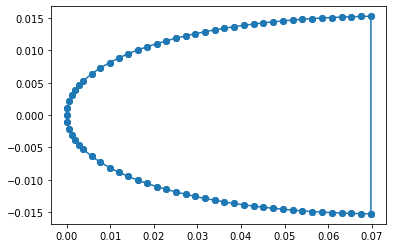

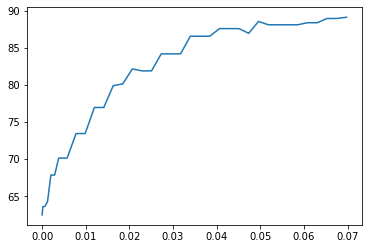

In [10]:
import pandas as pd
import numpy as np
import fem_velocidades  
import matplotlib.pyplot as plt
from matplotlib import cm
import time
import seaborn as sns
Elementos = pd.read_csv('elementos.txt')
Velocidades = pd.read_csv('flujo_velocidades.axdt')
Superficie = pd.read_csv('perfil.csv')
Superficie = Superficie[Superficie['X[m]']<0.07]
Superficie = Superficie.sort_values(by=['Y[m]'])


Modelo = fem_velocidades.modelo_fem(Elementos,Velocidades,Superficie)
Modelo = fem_velocidades.modelo_fem(Elementos,Velocidades,Superficie)
Modelo.set_T_remanso(273.15-5)
Modelo.set_presion_remanso(1e5)
Modelo.V_infinito=Modelo.V_infinito[5:] 
x,y=Modelo.exterior.xy
plt.plot(x,y,'o-')
plt.figure()
plt.plot(Modelo.V_infinito[:,0],Modelo.V_infinito[:,1])
print(Modelo.V_infinito)
import pandas as pd
import numpy as np
import fem_velocidades  
import matplotlib.pyplot as plt
from matplotlib import cm
import time
import seaborn as sns
import pickle
from scipy.optimize import minimize
from scipy.optimize import Bounds
betha = pickle.load( open( "betha.p", "rb" ) )
betha = np.delete(betha, 0, 0)

print(betha)
def coll_efficiency(x,betha):
    x_nodos = betha[:,0]
    bethas = betha[:,1]
    resultado=0
    for i in range(1,len(x_nodos)):
        if (x<=x_nodos[i]) and (x>=x_nodos[i-1]):
            resultado = (x-x_nodos[i-1])/(x_nodos[i]-x_nodos[i-1])*(bethas[i]-bethas[i-1])+bethas[i-1]
            break
    return resultado

In [16]:
Ensayos_glaze = pd.read_csv('C://Users//Miguel//Documents//calibración//Resultados_sensor_mayo//glaze//basededatos.csv',sep=';',decimal=',')
T_max = []
for T in Ensayos_glaze.max_T:
    T_max.append(T)
    if abs(T)<0.25:
        T_max[-1]=0
Ensayos_glaze['max_T']=T_max
Ensayos_glaze

,Unnamed: 0,sensor,MVD,LWC,T_0,T_f,max_T
0,0,A1,20,0.3,-4.37,-5.13,-4.08
1,1,A1,20,0.6,-4.79,-5.56,-4.57
2,2,A1,20,0.9,-4.65,-5.38,-4.39
3,3,A1,40,0.3,-4.65,-5.44,-4.42
4,4,A1,40,0.6,-5.30,-5.92,-5.03
...,...,...,...,...,...,...,...
67,67,A8,40,0.6,-5.20,-0.48,0.00
68,68,A8,40,0.9,-5.15,-0.14,0.00
69,69,A8,70,0.3,-4.51,-3.12,-2.84
70,70,A8,70,0.6,-5.94,-1.81,-1.35


In [17]:
Ensayos_glaze=Ensayos_glaze[(Ensayos_glaze['sensor'].isin(['A8','A6','A5','A4','A3']))]
posiciones_sensores = {'A8':0,'A6':0.01,'A5':0.018,'A4':0.027,'A3':0.035}
x_P35 = []
for i in Ensayos_glaze.index:
    x_P35.append(posiciones_sensores[Ensayos_glaze['sensor'].loc[i]])
    
Ensayos_glaze['x(m)']=x_P35
Ensayos_glaze=Ensayos_glaze[Ensayos_glaze.MVD==40]

C:\Users\Miguel\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


Se define una variable discreta $h_{i}$ variable con cada nodo

In [30]:
def coeficiente_convectivo(x,x_nodos,HCT):
    hct =HCT[0]
    for i in range(1,len(x_nodos)): 
        if x_nodos[i-1]<=x<=x_nodos[i]:
            hct=HCT[i-1]+(HCT[i]-HCT[i-1])/(x_nodos[i]-x_nodos[i-1])*(x-x_nodos[i-1])
    return hct

In [ ]:
def T_experimentales(x,x_nodos,T_experimentales):
    hct =T_experimentales[0]
    for i in range(1,len(x_nodos)): 
        if x_nodos[i-1]<=x<=x_nodos[i]:hct=T_experimentales[i-1]+(T_experimentales[i]-T_experimentales[i-1])/(x_nodos[i]-x_nodos[i-1])*(x-x_nodos[i-1])
    return hct

In [3]:
def minimizacion_error(constantes_HCT):
    
    HCT= constantes_HCT
    Modelo_termico = fem_velocidades.analisis_termico()
    Modelo_termico.set_T_remanso(T_remanso+273.15)
    Modelo_termico.set_recovery_factor(1)
    Modelo_termico.set_presion_remanso(101325)
    Modelo_termico.set_LWC(LWC)
    Modelo_termico.set_cuerda(11.01)
    Modelo_termico.set_diametro_caracteristico(0.02)
    Modelo_termico.set_velocidad_flujo(V)
    Modelo_termico.set_freezing_fraction(0.8)
    Modelo_termico.set_flujo_masico_entrada(0)
    Modelo_termico.set_T_superficie_anterior(273.15)
    Modelo_termico.set_cp_ws_anterior(1.004)
    Modelo_termico.set_T_superficie(273.15)
    Modelo_termico.set_local_collection_efficiency(0.5)
    Modelo_termico.set_freezing_fraction(1)
    Modelo_termico.set_tamano_gota(20e-6)
    Modelo_termico.V_e = Modelo_termico.V
    Modelo_termico.T_estatica = Modelo_termico.T_remanso -Modelo_termico.V**2/2/1004.5
    Modelo_termico.set_coeficiente_convectivo(400)
    Modelo_termico.calculo_todos_calores()
    #plt.plot(x_experimental,T_experimental)
    x =np.linspace(0,x_experimental[-1],100)
    col_eff = betha[:,1]
    # print(x,col_eff)
    # print(Modelo_termico.betha_stagnation,col_eff[0])
    n = np.zeros(len(x))
    iter_max =10000
    T_sur  = np.zeros(len(x))
    Delta_T_sur  = np.zeros(len(x))
    for nodo in range(len(x)):
        Modelo_termico.set_coeficiente_convectivo(coeficiente_convectivo(x[nodo],x_experimental,HCT))
        for i in range(1,len(Modelo.V_infinito[:,0])):
            if (x[nodo]<= Modelo.V_infinito[i,0]) and  (x[nodo]>= Modelo.V_infinito[i-1,0]):
                Ve=Modelo.V_infinito[i,1]
        Modelo_termico.T_estatica = Modelo_termico.T_remanso -Ve**2/2/1004.5
        Modelo_termico.V_e = Ve
        Modelo_termico.set_T_superficie(273.15)
        Modelo_termico.set_local_collection_efficiency(coll_efficiency(x[nodo],betha))
        T_sur_0 =  Modelo_termico.T_remanso
        if nodo !=0:
            r = np.sqrt(Modelo_termico.Prandtl)
            T_sur_0 = Modelo_termico.T_estatica+r*Ve**2/2/1004.5
            Modelo_termico.set_recovery_factor(np.sqrt(Modelo_termico.Prandtl))

        n_0 =0.1
        n_1 = 0.2
        for i in range(iter_max):
            Modelo_termico.set_freezing_fraction(n_0)
            f_0 =Modelo_termico.calculo_todos_calores()
            Modelo_termico.set_freezing_fraction(n_1)
            f_1 =Modelo_termico.calculo_todos_calores()
            df = (f_1-f_0)/(n_1-n_0)
            n_2 = n_1 -f_1/df
            if abs(f_1)<0.1:
                break
            n_0 = n_1
            n_1 =n_2
        if i ==iter_max-1:
            
            n_1 =1
            break
        if n_1 >1:
            Modelo_termico.set_freezing_fraction(1)
            #print(Modelo_termico.n_0)
            T_0 =273.15
            T_1 =260
            for i in range(iter_max): 
                Modelo_termico.set_T_superficie(T_0)
                f_0 =Modelo_termico.calculo_todos_calores()
                Modelo_termico.set_T_superficie(T_1)
                f_1 =Modelo_termico.calculo_todos_calores()
                df = (f_1-f_0)/(T_1-T_0)
                T_2 = T_1 -f_1/df
                if abs(f_1)<0.1:
                    break
                T_0 = T_1
                T_1 =T_2

        Modelo_termico.set_flujo_masico_entrada(Modelo_termico.m_out)
        #print(Modelo_termico.m_e )
        #print(Modelo_termico.m_c,Modelo_termico.m_out,Modelo_termico.n_0)
        #plt.plot(x[nodo],coll_efficiency(x[nodo],betha),'ok')
        if nodo ==0: Modelo_termico.set_flujo_masico_entrada(Modelo_termico.m_out/2)
        Modelo_termico.set_T_superficie_anterior(Modelo_termico.T_superficie)
        Modelo_termico.set_cp_ws_anterior(Modelo_termico.cp_ws(Modelo_termico.T_superficie))
        T_sur[nodo] = Modelo_termico.T_superficie
        Delta_T_sur[nodo]=T_sur[nodo]-T_sur_0
        n[nodo] = Modelo_termico.n_0
    T_teorico =np.zeros(len(T_experimental))
    #T_teorico[0] = Delta_T_sur[0]
    T_teorico[0] = T_sur[0]-273.15
#     error = (T_teorico[0] - Delta_T_experimental[0])**2
    error = (T_teorico[0] - T_experimental[0])**2
    for i in range(1,len(T_experimental)):
      #  T_exp = Delta_T_experimental[i]
        for j in range(1,len(x)):
            if (x_experimental[i]>=x[j-1]) and (x_experimental[i]<=x[j]):
                #T_teorico[i]= Delta_T_sur[j]
                T_teorico[i]= T_sur[j]-273.15
                error = error + (T_teorico[i] - T_experimental[i])**2
                break
    
    return np.sqrt(error)

In [4]:
def Delta_T_analitico(HCT):
    
    Modelo_termico = fem_velocidades.analisis_termico()
    Modelo_termico.set_T_remanso(T_remanso+273.15)
    Modelo_termico.set_recovery_factor(1)
    Modelo_termico.set_presion_remanso(101325)
    Modelo_termico.set_LWC(LWC)
    Modelo_termico.set_cuerda(11.01)
    Modelo_termico.set_diametro_caracteristico(0.02)
    Modelo_termico.set_velocidad_flujo(V)
    Modelo_termico.set_freezing_fraction(0.8)
    Modelo_termico.set_flujo_masico_entrada(0)
    Modelo_termico.set_T_superficie_anterior(273.15)
    Modelo_termico.set_cp_ws_anterior(1.004)
    Modelo_termico.set_T_superficie(273.15)
    Modelo_termico.set_local_collection_efficiency(0.5)
    Modelo_termico.set_freezing_fraction(1)
    Modelo_termico.set_tamano_gota(20e-6)
    Modelo_termico.V_e = Modelo_termico.V
    Modelo_termico.T_estatica = Modelo_termico.T_remanso -Modelo_termico.V**2/2/1004.5
    Modelo_termico.set_coeficiente_convectivo(400)
    Modelo_termico.calculo_todos_calores()
    #plt.plot(x_experimental,T_experimental)
    x =np.linspace(0,x_experimental[-1],100)
    col_eff = betha[:,1]
    # print(x,col_eff)
    # print(Modelo_termico.betha_stagnation,col_eff[0])
    n = np.zeros(len(x))
    iter_max =100000
    T_sur  = np.zeros(len(x))
    Delta_T_sur  = np.zeros(len(x))
    for nodo in range(len(x)):
        Modelo_termico.set_coeficiente_convectivo(coeficiente_convectivo(x[nodo],x_experimental,HCT))
        for i in range(1,len(Modelo.V_infinito[:,0])):
            if (x[nodo]<= Modelo.V_infinito[i,0]) and  (x[nodo]>= Modelo.V_infinito[i-1,0]):
                Ve=Modelo.V_infinito[i,1]
        Modelo_termico.T_estatica = Modelo_termico.T_remanso -Ve**2/2/1004.5
        Modelo_termico.V_e = Ve
        Modelo_termico.set_T_superficie(273.15)
        Modelo_termico.set_local_collection_efficiency(coll_efficiency(x[nodo],betha))
        T_sur_0 =  Modelo_termico.T_remanso
        if nodo !=0:
            r = np.sqrt(Modelo_termico.Prandtl)
            T_sur_0 = Modelo_termico.T_estatica+r*Ve**2/2/1004.5
            Modelo_termico.set_recovery_factor(np.sqrt(Modelo_termico.Prandtl))

        n_0 =0.1
        n_1 = 0.2
        for i in range(iter_max):
            Modelo_termico.set_freezing_fraction(n_0)
            f_0 =Modelo_termico.calculo_todos_calores()
            Modelo_termico.set_freezing_fraction(n_1)
            f_1 =Modelo_termico.calculo_todos_calores()
            df = (f_1-f_0)/(n_1-n_0)
            n_2 = n_1 -f_1/df
            if abs(f_1)<0.1:
                break
            n_0 = n_1
            n_1 =n_2
        if i ==iter_max-1:
            print(f_1)
            
            break
        if n_1 >1:
            Modelo_termico.set_freezing_fraction(1)
            #print(Modelo_termico.n_0)
            T_0 =273.15
            T_1 =260
            for i in range(iter_max): 
                Modelo_termico.set_T_superficie(T_0)
                f_0 =Modelo_termico.calculo_todos_calores()
                Modelo_termico.set_T_superficie(T_1)
                f_1 =Modelo_termico.calculo_todos_calores()
                df = (f_1-f_0)/(T_1-T_0)
                T_2 = T_1 -f_1/df
                if abs(f_1)<0.1:
                    break
                T_0 = T_1
                T_1 =T_2

        Modelo_termico.set_flujo_masico_entrada(Modelo_termico.m_out)
        if Modelo_termico.m_out!=0:print(Modelo_termico.m_out)
        #print(Modelo_termico.m_e )
        #print(Modelo_termico.m_c,Modelo_termico.m_out,Modelo_termico.n_0)
        #plt.plot(x[nodo],coll_efficiency(x[nodo],betha),'ok')
        if nodo ==0: Modelo_termico.set_flujo_masico_entrada(Modelo_termico.m_out)
        Modelo_termico.set_T_superficie_anterior(Modelo_termico.T_superficie)
        Modelo_termico.set_cp_ws_anterior(Modelo_termico.cp_ws(Modelo_termico.T_superficie))
        T_sur[nodo] = Modelo_termico.T_superficie
        Delta_T_sur[nodo]=T_sur[nodo]-T_sur_0
        n[nodo] = Modelo_termico.n_0
        #plt.plot(x,T_sur-273.15,label='h_c='+str(h_c),linewidth=0.5)   
    return (x,T_sur-273.15)

In [11]:
LWC=0.9
x_experimental=[0,0.01,0.018,0.027,0.035]

T_remanso = -4
T_experimental= [0,0,0,-2,-4]
#Delta_T_experimental = np.array(Ensayo['Delta_T'])
V = 70
h_c_0 =np.array([700 for _ in range(len(x_experimental))])
result = minimize(minimizacion_error, h_c_0, method='Nelder-Mead',  options={ 'adaptive': True})

C:\Users\Miguel\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\Miguel\Desktop\Fluent_perfil\fem_velocidades.py:760: RuntimeWarning: invalid value encountered in double_scalars
  m_out = (1-n_0)*(dot_m+m_in)-dot_me
C:\Users\Miguel\Desktop\Fluent_perfil\fem_velocidades.py:766: RuntimeWarning: invalid value encountered in double_scalars
  q_5 = n_0*(dot_m+m_in)*(cp_is*(T_superficie-273.15)-Lambda_f)


KeyboardInterrupt: 

In [12]:
print(result)
(x,Delta_T_sur)=Delta_T_analitico(result.x)
fig, ax =plt.subplots(ncols=2,figsize=(16,4),sharey=False)
ax[0].plot(x_experimental,T_experimental,'k--+',label='experimental')
ax[0].plot(x,Delta_T_sur,'k',label='analitical')
ax[0].legend()
ax[1].plot(x_experimental,result.x,'k')

NameError: name 'result' is not defined

[-4.95 -4.85 -4.72 -4.7 ]
 final_simplex: (array([[772.37636093, 439.87887118, 492.91117112, 319.10468332],
       [772.37639548, 439.87889823, 492.91118082, 319.10464465],
       [772.37645235, 439.87888508, 492.91121987, 319.10466773],
       [772.37645673, 439.87885769, 492.91117198, 319.10464358],
       [772.37642075, 439.87885019, 492.91124374, 319.10461633]]), array([1.37933118e-07, 1.37971464e-07, 1.45040212e-07, 1.50600381e-07,
       1.77975897e-07]))
           fun: 1.379331178038917e-07
       message: 'Optimization terminated successfully.'
          nfev: 333
           nit: 182
        status: 0
       success: True
             x: array([772.37636093, 439.87887118, 492.91117112, 319.10468332])


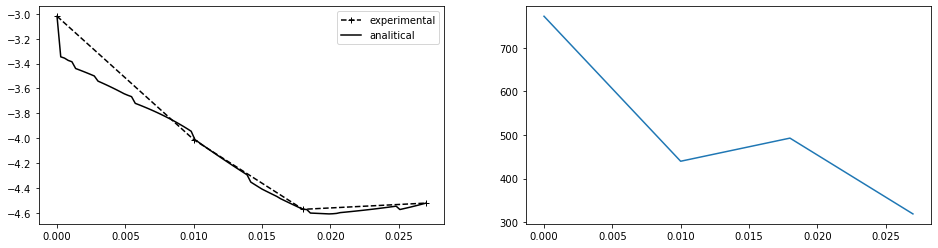

In [18]:

Resultados=[]
for LWC in [.3]:
    Ensayo = Ensayos_glaze[(Ensayos_glaze.LWC ==LWC) & (Ensayos_glaze['x(m)']<0.03)]
    Ensayo =Ensayo.sort_values(by=['x(m)'],ascending=True)
    x_experimental =np.array(Ensayo['x(m)'])

    T_pared =np.array(Ensayo['T_0'])
    print(T_pared)
    T_remanso = T_pared[0]
    T_experimental=np.array(Ensayo['max_T'])
    #Delta_T_experimental = np.array(Ensayo['Delta_T'])
    V = 70
    h_c_0 =np.array([700 for _ in range(len(x_experimental))])
    result = minimize(minimizacion_error, h_c_0, method='Nelder-Mead',  options={ 'adaptive': True,'maxfev':10000})
    print(result)
    (x,T_sur)=Delta_T_analitico(result.x)
    
    fig, ax =plt.subplots(ncols=2,figsize=(16,4),sharey=False)
    ax[0].plot(x_experimental,T_experimental,'--+k',label='experimental')
    ax[0].plot(x,T_sur,'k',label='analitical')
    ax[0].legend()
    ax[1].plot(x_experimental,result.x)
    for i in range(len(x_experimental)):
        Resultados.append([LWC,x_experimental[i],result.x[i]])

In [ ]:
Resultados = pd.DataFrame(data = Resultados,columns =['LWC','x(m)','HTC'])
sns.relplot(x='x(m)', y="HTC", palette="Set2",
            dashes=True, markers=True, kind="line", data=Resultados)

[-4.95 -4.85 -4.72 -4.7 ]
     fun: 1.9895196601282805e-11
     jac: array([0.        , 0.        , 0.        , 0.00285922, 0.        ])
 message: 'Maximum number of iterations has been exceeded.'
    nfev: 7629
     nit: 100
 success: False
       x: array([328.0956993 , 310.62137037, 793.81177705, 373.72142221,
       619.90906101])


ValueError: x and y must have same first dimension, but have shapes (4,) and (5,)

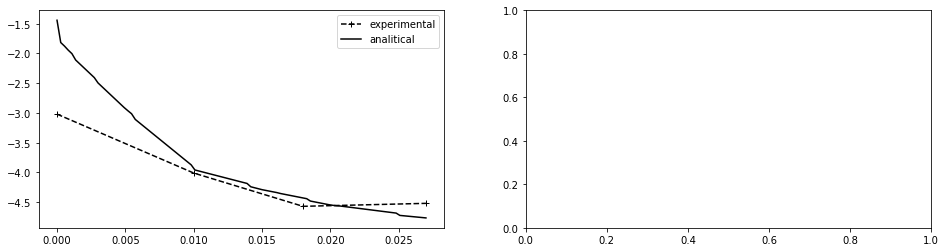

In [70]:
for LWC in [.3]:
    Ensayo = Ensayos_glaze[(Ensayos_glaze.LWC ==LWC) & (Ensayos_glaze['x(m)']<0.03)]
    Ensayo =Ensayo.sort_values(by=['x(m)'],ascending=True)
    x_experimental =np.array(Ensayo['x(m)'])

    T_pared =np.array(Ensayo['T_0'])
    print(T_pared)
    T_remanso = T_pared[0]
    T_experimental=np.array(Ensayo['max_T'])
    #Delta_T_experimental = np.array(Ensayo['Delta_T'])
    V = 70
    h_c_0 =np.array([500 for _ in range(len(x_experimental))])
    
    #result = minimize(minimizacion_error, h_c_0, method='Nelder-Mead',  options={ 'adaptive': True,'maxfev':10000})
    print(result)
    h_c_0[0]=700
    h_c_0 = [400 , 425, 425, 425]
    (x,T_sur)=Delta_T_analitico( h_c_0)
    
    fig, ax =plt.subplots(ncols=2,figsize=(16,4),sharey=False)
    ax[0].plot(x_experimental,T_experimental,'--+k',label='experimental')
    ax[0].plot(x,T_sur,'k',label='analitical')
    ax[0].legend()
    ax[1].plot(x_experimental,result.x)

In [23]:
def minimizacion_error_f(ff):
    constantes_HCT=h_c_0
    HCT= constantes_HCT
    Modelo_termico = fem_velocidades.analisis_termico()
    Modelo_termico.set_T_remanso(T_remanso+273.15)
    Modelo_termico.set_recovery_factor(1)
    Modelo_termico.set_presion_remanso(101325)
    Modelo_termico.set_LWC(LWC)
    Modelo_termico.set_cuerda(11.01)
    Modelo_termico.set_diametro_caracteristico(0.02)
    Modelo_termico.set_velocidad_flujo(V)
    Modelo_termico.set_freezing_fraction(0.8)
    Modelo_termico.set_flujo_masico_entrada(0)
    Modelo_termico.set_T_superficie_anterior(273.15)
    Modelo_termico.set_cp_ws_anterior(1.004)
    Modelo_termico.set_T_superficie(273.15)
    Modelo_termico.set_local_collection_efficiency(0.5)
    Modelo_termico.set_freezing_fraction(1)
    Modelo_termico.set_tamano_gota(20e-6)
    Modelo_termico.V_e = Modelo_termico.V
    Modelo_termico.T_estatica = Modelo_termico.T_remanso -Modelo_termico.V**2/2/1004.5
    Modelo_termico.set_coeficiente_convectivo(400)
    Modelo_termico.calculo_todos_calores()
    #plt.plot(x_experimental,T_experimental)
    x =np.linspace(0,x_experimental[-1],100)
    col_eff = betha[:,1]
    # print(x,col_eff)
    # print(Modelo_termico.betha_stagnation,col_eff[0])
    n = np.zeros(len(x))
    iter_max =10000
    T_sur  = np.zeros(len(x))
    Delta_T_sur  = np.zeros(len(x))
    for nodo in range(len(x)):
        Modelo_termico.set_coeficiente_convectivo(coeficiente_convectivo(x[nodo],x_experimental,HCT))
        for i in range(1,len(Modelo.V_infinito[:,0])):
            if (x[nodo]<= Modelo.V_infinito[i,0]) and  (x[nodo]>= Modelo.V_infinito[i-1,0]):
                Ve=Modelo.V_infinito[i,1]
        Modelo_termico.T_estatica = Modelo_termico.T_remanso -Ve**2/2/1004.5
        Modelo_termico.V_e = Ve
        Modelo_termico.set_T_superficie(273.15)
        Modelo_termico.set_local_collection_efficiency(coll_efficiency(x[nodo],betha))
        T_sur_0 =  Modelo_termico.T_remanso
        if nodo !=0:
            r = np.sqrt(Modelo_termico.Prandtl)
            T_sur_0 = Modelo_termico.T_estatica+r*Ve**2/2/1004.5
            Modelo_termico.set_recovery_factor(np.sqrt(Modelo_termico.Prandtl))

        n_1 =coeficiente_convectivo(x[nodo],x_experimental,ff)
        if i ==iter_max-1:
            
            n_1 =1
            break
        if n_1 >1:
            Modelo_termico.set_freezing_fraction(1)
            #print(Modelo_termico.n_0)
            T_0 =273.15
            T_1 =260
            for i in range(iter_max): 
                Modelo_termico.set_T_superficie(T_0)
                f_0 =Modelo_termico.calculo_todos_calores()
                Modelo_termico.set_T_superficie(T_1)
                f_1 =Modelo_termico.calculo_todos_calores()
                df = (f_1-f_0)/(T_1-T_0)
                T_2 = T_1 -f_1/df
                if abs(f_1)<0.1:
                    break
                T_0 = T_1
                T_1 =T_2

        Modelo_termico.set_flujo_masico_entrada(Modelo_termico.m_out)
        #print(Modelo_termico.m_e )
        #print(Modelo_termico.m_c,Modelo_termico.m_out,Modelo_termico.n_0)
        #plt.plot(x[nodo],coll_efficiency(x[nodo],betha),'ok')
        if nodo ==0: Modelo_termico.set_flujo_masico_entrada(Modelo_termico.m_out/2)
        Modelo_termico.set_T_superficie_anterior(Modelo_termico.T_superficie)
        Modelo_termico.set_cp_ws_anterior(Modelo_termico.cp_ws(Modelo_termico.T_superficie))
        T_sur[nodo] = Modelo_termico.T_superficie
        Delta_T_sur[nodo]=T_sur[nodo]-T_sur_0
        n[nodo] = Modelo_termico.n_0
    T_teorico =np.zeros(len(T_experimental))
    #T_teorico[0] = Delta_T_sur[0]
    T_teorico[0] = T_sur[0]-273.15
#     error = (T_teorico[0] - Delta_T_experimental[0])**2
    error = (T_teorico[0] - T_experimental[0])**2
    for i in range(1,len(T_experimental)):
      #  T_exp = Delta_T_experimental[i]
        for j in range(1,len(x)):
            if (x_experimental[i]>=x[j-1]) and (x_experimental[i]<=x[j]):
                #T_teorico[i]= Delta_T_sur[j]
                T_teorico[i]= T_sur[j]-273.15
                error = error + (T_teorico[i] - T_experimental[i])**2
                break
    
    return np.sqrt(error)

In [47]:
LWC=0.9
x_experimental=[0,0.01,0.018,0.027]

T_remanso = -4
T_experimental= [0,0,0,-2]
#Delta_T_experimental = np.array(Ensayo['Delta_T'])
V = 70
from scipy.optimize import rosen, differential_evolution
bounds = [(0,1000), (0,1000), (0,1000), (0,1000), (0,1000)]
result = differential_evolution(minimizacion_error,bounds,maxiter=100)

# HCT= [700.37636093, 400, 400, 319.10468332]
# Modelo_termico = fem_velocidades.analisis_termico()
# Modelo_termico.set_T_remanso(T_remanso+273.15)
# Modelo_termico.set_recovery_factor(1)
# Modelo_termico.set_presion_remanso(101325)
# Modelo_termico.set_LWC(LWC)
# Modelo_termico.set_cuerda(11.01)
# Modelo_termico.set_diametro_caracteristico(0.02)
# Modelo_termico.set_velocidad_flujo(V)
# Modelo_termico.set_freezing_fraction(0.8)
# Modelo_termico.set_flujo_masico_entrada(0)
# Modelo_termico.set_T_superficie_anterior(273.15)
# Modelo_termico.set_cp_ws_anterior(1.004)
# Modelo_termico.set_T_superficie(273.15)
# Modelo_termico.set_local_collection_efficiency(0.5)
# Modelo_termico.set_freezing_fraction(1)
# Modelo_termico.set_tamano_gota(20e-6)
# Modelo_termico.V_e = Modelo_termico.V
# Modelo_termico.T_estatica = Modelo_termico.T_remanso -Modelo_termico.V**2/2/1004.5
# Modelo_termico.set_coeficiente_convectivo(400)
# Modelo_termico.calculo_todos_calores()
# #plt.plot(x_experimental,T_experimental)
# x =np.linspace(0,x_experimental[-1],100)
# col_eff = betha[:,1]
# # print(x,col_eff)
# # print(Modelo_termico.betha_stagnation,col_eff[0])
# n = np.zeros(len(x))
# iter_max =10000
# T_sur  = np.zeros(len(x))
# Delta_T_sur  = np.zeros(len(x))
# for nodo in range(len(x)):
#     Modelo_termico.set_coeficiente_convectivo(coeficiente_convectivo(x[nodo],x_experimental,HCT))
#     for i in range(1,len(Modelo.V_infinito[:,0])):
#         if (x[nodo]<= Modelo.V_infinito[i,0]) and  (x[nodo]>= Modelo.V_infinito[i-1,0]):
#             Ve=Modelo.V_infinito[i,1]
#     Modelo_termico.T_estatica = Modelo_termico.T_remanso -Ve**2/2/1004.5
#     Modelo_termico.V_e = Ve
#     Modelo_termico.set_T_superficie(273.15)
#     Modelo_termico.set_local_collection_efficiency(coll_efficiency(x[nodo],betha))
#     T_sur_0 =  Modelo_termico.T_remanso
#     if nodo !=0:
#         r = np.sqrt(Modelo_termico.Prandtl)
#         T_sur_0 = Modelo_termico.T_estatica+r*Ve**2/2/1004.5
#         Modelo_termico.set_recovery_factor(np.sqrt(Modelo_termico.Prandtl))

#     n_0 =0.1
#     n_1 = 0.2
#     for i in range(iter_max):
#         Modelo_termico.set_freezing_fraction(n_0)
#         f_0 =Modelo_termico.calculo_todos_calores()
#         Modelo_termico.set_freezing_fraction(n_1)
#         f_1 =Modelo_termico.calculo_todos_calores()
#         df = (f_1-f_0)/(n_1-n_0)
#         n_2 = n_1 -f_1/df
#         if abs(f_1)<0.1:
#             break
#         n_0 = n_1
#         n_1 =n_2
#     if i ==iter_max-1:

#         n_1 =1
#         break
#     if n_1 >1:
#         Modelo_termico.set_freezing_fraction(1)
#         #print(Modelo_termico.n_0)
#         T_0 =273.15
#         T_1 =260
#         for i in range(iter_max): 
#             Modelo_termico.set_T_superficie(T_0)
#             f_0 =Modelo_termico.calculo_todos_calores()
#             Modelo_termico.set_T_superficie(T_1)
#             f_1 =Modelo_termico.calculo_todos_calores()
#             df = (f_1-f_0)/(T_1-T_0)
#             T_2 = T_1 -f_1/df
#             if abs(f_1)<0.1:
#                 break
#             T_0 = T_1
#             T_1 =T_2

#     Modelo_termico.set_flujo_masico_entrada(Modelo_termico.m_out)
#     #print(Modelo_termico.m_e )
#     #print(Modelo_termico.m_c,Modelo_termico.m_out,Modelo_termico.n_0)
#     #plt.plot(x[nodo],coll_efficiency(x[nodo],betha),'ok')
#     if nodo ==0: Modelo_termico.set_flujo_masico_entrada(Modelo_termico.m_out)
#     Modelo_termico.set_T_superficie_anterior(Modelo_termico.T_superficie)
#     Modelo_termico.set_cp_ws_anterior(Modelo_termico.cp_ws(Modelo_termico.T_superficie))
#     T_sur[nodo] = Modelo_termico.T_superficie
#     Delta_T_sur[nodo]=T_sur[nodo]-T_sur_0
#     n[nodo] = Modelo_termico.n_0
    
# plt.plot(x,T_sur-273.15,x_experimental,T_experimental,'-+')

In [48]:
result.x

array([328.0956993 , 310.62137037, 793.81177705, 373.72142221,
       619.90906101])

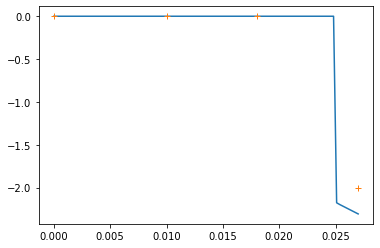

In [69]:
LWC=0.9
x_experimental=[0,0.01,0.018,0.027]

T_remanso = -4
T_experimental= [0,0,0,-2]
#Delta_T_experimental = np.array(Ensayo['Delta_T'])
V = 70
HCT= [425 , 425, 425, 425,425]
Modelo_termico = fem_velocidades.analisis_termico()
Modelo_termico.set_T_remanso(T_remanso+273.15)
Modelo_termico.set_recovery_factor(1)
Modelo_termico.set_presion_remanso(101325)
Modelo_termico.set_LWC(LWC)
Modelo_termico.set_cuerda(11.01)
Modelo_termico.set_diametro_caracteristico(0.02)
Modelo_termico.set_velocidad_flujo(V)
Modelo_termico.set_freezing_fraction(0.8)
Modelo_termico.set_flujo_masico_entrada(0)
Modelo_termico.set_T_superficie_anterior(273.15)
Modelo_termico.set_cp_ws_anterior(1.004)
Modelo_termico.set_T_superficie(273.15)
Modelo_termico.set_local_collection_efficiency(0.5)
Modelo_termico.set_freezing_fraction(1)
Modelo_termico.set_tamano_gota(20e-6)
Modelo_termico.V_e = Modelo_termico.V
Modelo_termico.T_estatica = Modelo_termico.T_remanso -Modelo_termico.V**2/2/1004.5
Modelo_termico.set_coeficiente_convectivo(400)
Modelo_termico.calculo_todos_calores()
#plt.plot(x_experimental,T_experimental)
x =np.linspace(0,x_experimental[-1],100)
col_eff = betha[:,1]
# print(x,col_eff)
# print(Modelo_termico.betha_stagnation,col_eff[0])
n = np.zeros(len(x))
iter_max =10000
T_sur  = np.zeros(len(x))
Delta_T_sur  = np.zeros(len(x))
for nodo in range(len(x)):
    Modelo_termico.set_coeficiente_convectivo(coeficiente_convectivo(x[nodo],x_experimental,HCT))
    for i in range(1,len(Modelo.V_infinito[:,0])):
        if (x[nodo]<= Modelo.V_infinito[i,0]) and  (x[nodo]>= Modelo.V_infinito[i-1,0]):
            Ve=Modelo.V_infinito[i,1]
    Modelo_termico.T_estatica = Modelo_termico.T_remanso -Ve**2/2/1004.5
    Modelo_termico.V_e = Ve
    Modelo_termico.set_T_superficie(273.15)
    Modelo_termico.set_local_collection_efficiency(coll_efficiency(x[nodo],betha))
    T_sur_0 =  Modelo_termico.T_remanso
    if nodo !=0:
        r = np.sqrt(Modelo_termico.Prandtl)
        T_sur_0 = Modelo_termico.T_estatica+r*Ve**2/2/1004.5
        Modelo_termico.set_recovery_factor(np.sqrt(Modelo_termico.Prandtl))

    n_0 =0.1
    n_1 = 0.2
    for i in range(iter_max):
        Modelo_termico.set_freezing_fraction(n_0)
        f_0 =Modelo_termico.calculo_todos_calores()
        Modelo_termico.set_freezing_fraction(n_1)
        f_1 =Modelo_termico.calculo_todos_calores()
        df = (f_1-f_0)/(n_1-n_0)
        n_2 = n_1 -f_1/df
        if abs(f_1)<0.1:
            break
        n_0 = n_1
        n_1 =n_2
    if i ==iter_max-1:

        n_1 =1
        break
    if n_1 >1:
        Modelo_termico.set_freezing_fraction(1)
        #print(Modelo_termico.n_0)
        T_0 =273.15
        T_1 =260
        for i in range(iter_max): 
            Modelo_termico.set_T_superficie(T_0)
            f_0 =Modelo_termico.calculo_todos_calores()
            Modelo_termico.set_T_superficie(T_1)
            f_1 =Modelo_termico.calculo_todos_calores()
            df = (f_1-f_0)/(T_1-T_0)
            T_2 = T_1 -f_1/df
            if abs(f_1)<0.1:
                break
            T_0 = T_1
            T_1 =T_2

    Modelo_termico.set_flujo_masico_entrada(Modelo_termico.m_out)
    #print(Modelo_termico.m_e )
    #print(Modelo_termico.m_c,Modelo_termico.m_out,Modelo_termico.n_0)
    #plt.plot(x[nodo],coll_efficiency(x[nodo],betha),'ok')
    if nodo ==0: Modelo_termico.set_flujo_masico_entrada(Modelo_termico.m_out)
    Modelo_termico.set_T_superficie_anterior(Modelo_termico.T_superficie)
    Modelo_termico.set_cp_ws_anterior(Modelo_termico.cp_ws(Modelo_termico.T_superficie))
    T_sur[nodo] = Modelo_termico.T_superficie
    Delta_T_sur[nodo]=T_sur[nodo]-T_sur_0
    n[nodo] = Modelo_termico.n_0
    
plt.plot(x,T_sur-273.15,x_experimental,T_experimental,'+')